In [1]:
# !pip install openpyxl


# Ideas
- Load data from local disk
- Analyse and build a prediction model using Linear Regresssion, XgboostRegressor,RandomForest,Bagging Regressor and ensemble learning techniques
- Measured the accurate (or the error) from those technique


# Libs and import data

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# let load our data
df=pd.read_excel(r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict/Dust_Monitoring_FYS_Data.xlsx')
df.head()

,date,time,timestamp,pm2.5,pm10,tsp,temp,hum,press,wspd,wdir,rain
0,2024-01-31,00:00:27,1706630427,37,44,74,26.4,80,1.012,0.7,114,0.0
1,2024-01-31,00:01:27,1706630487,41,51,85,26.4,81,1.012,1.4,93,0.0
2,2024-01-31,00:02:28,1706630548,38,46,77,26.4,80,1.012,0.8,99,0.0
3,2024-01-31,00:03:27,1706630607,41,52,87,26.5,80,1.012,1.3,70,0.0
4,2024-01-31,00:04:28,1706630668,42,53,89,26.5,81,1.012,0.9,74,0.0


# Exploratory Data Analysis

## Data cleaning/preprocessing
- Droping tsp as its not going to be used in  training our model
- Create the datetime feature from the date and time features
- convert dataframes data to float

In [7]:
df=df.rename(columns={'pm2.5':'pm25'})
df=df.drop(['tsp',],axis=1)
df['date']=df['date'].astype(str)
df['time']=df['time'].astype(str)





In [8]:

df['datetime'] = pd.to_datetime(df['date']+' '+df['time'],format='mixed')
# df['datetime'] = pd.to_datetime(df['date']+' '+df['time'])
df=df.drop(['date','time','timestamp',],axis=1)
df.set_index(['datetime'],inplace=True)

df=df.astype(float)

In [9]:
df.head()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
datetime,,,,,,,,
2024-01-31 00:00:27,37.0,44.0,26.4,80.0,1.012,0.7,114.0,0.0
2024-01-31 00:01:27,41.0,51.0,26.4,81.0,1.012,1.4,93.0,0.0
2024-01-31 00:02:28,38.0,46.0,26.4,80.0,1.012,0.8,99.0,0.0
2024-01-31 00:03:27,41.0,52.0,26.5,80.0,1.012,1.3,70.0,0.0
2024-01-31 00:04:28,42.0,53.0,26.5,81.0,1.012,0.9,74.0,0.0


## Summary Statistics

In [10]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
count,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000
mean,42.045128,49.424641,28.920174,74.322283,0.974792,0.729745,147.654846,9.222369
std,54.281286,55.789973,6.144425,18.324413,0.177946,0.826272,103.225112,17.979483
min,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,38.000000,27.100000,66.000000,1.006000,0.300000,73.000000,0.000000
50%,41.000000,49.000000,28.900000,79.000000,1.007000,0.600000,113.000000,0.000000
75%,48.000000,60.000000,32.600000,87.000000,1.009000,1.000000,213.000000,17.400000
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,51.300000,359.000000,74.200000


>**Conclusion:**
>-From the summary satistics we can notice outliers in pm25 and pm10 base on it mininmum,maximum,and mean value we will visulaise this outliers in the data visualisation section

## Data Visualisation

In [11]:
data=df.copy(deep=True)

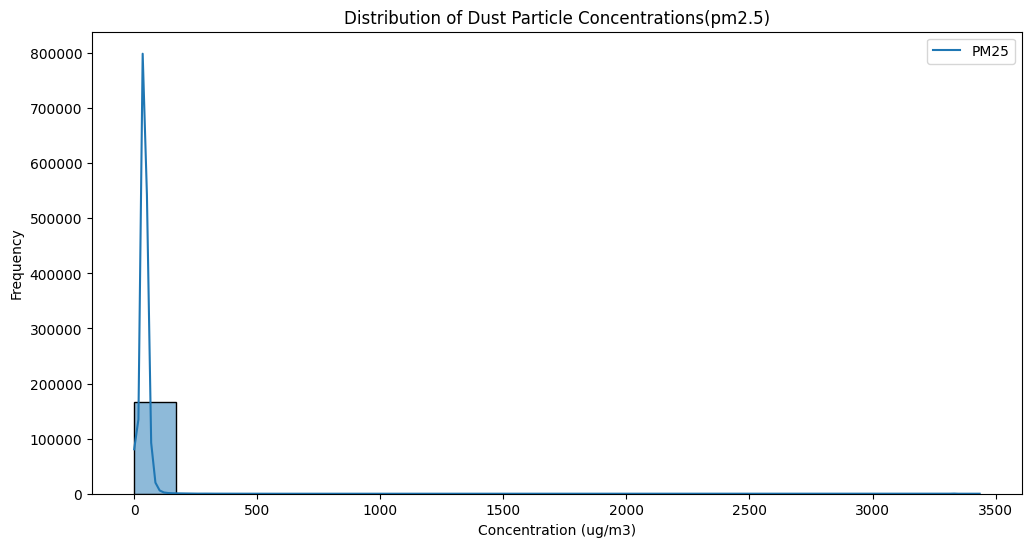

In [12]:
# Distribution of dust particle concentrations
plt.figure(figsize=(12, 6))
sns.histplot(data=data[['pm25' ]], bins=20, kde=True)
plt.title('Distribution of Dust Particle Concentrations(pm2.5)')
plt.xlabel('Concentration (ug/m3)')
plt.ylabel('Frequency')
plt.legend(['PM25',])
plt.show()

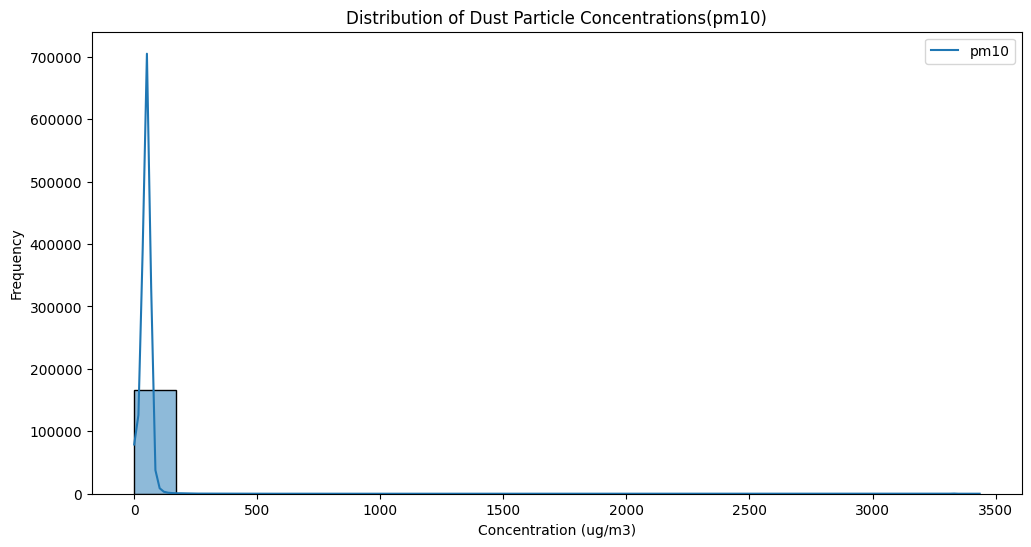

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data[['pm10' ]], bins=20, kde=True)
plt.title('Distribution of Dust Particle Concentrations(pm10)')
plt.xlabel('Concentration (ug/m3)')
plt.ylabel('Frequency')
plt.legend(['pm10',])
plt.show()

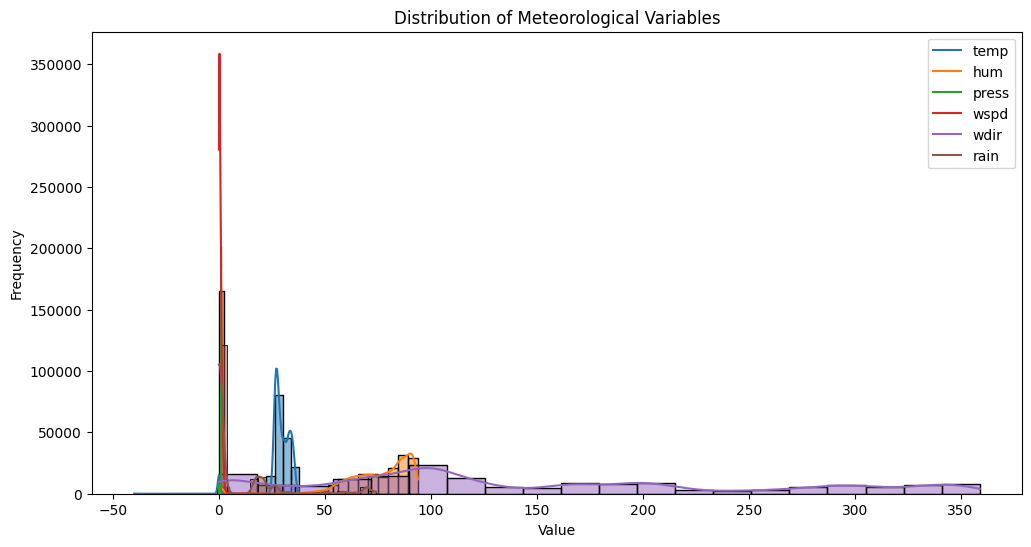

In [14]:
# Distribution of meteorological variables
meteorological_vars = ['temp', 'hum', 'press', 'wspd', 'wdir', 'rain']
plt.figure(figsize=(12, 6))
for var in meteorological_vars:
    sns.histplot(data[var], bins=20, kde=True, alpha=0.5)
plt.title('Distribution of Meteorological Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(meteorological_vars)
plt.show()

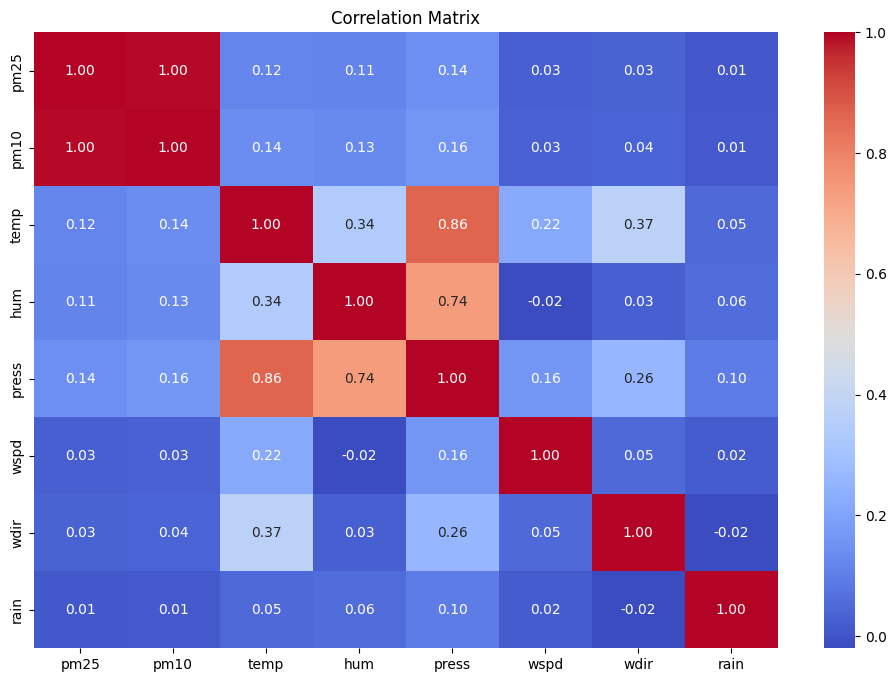

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

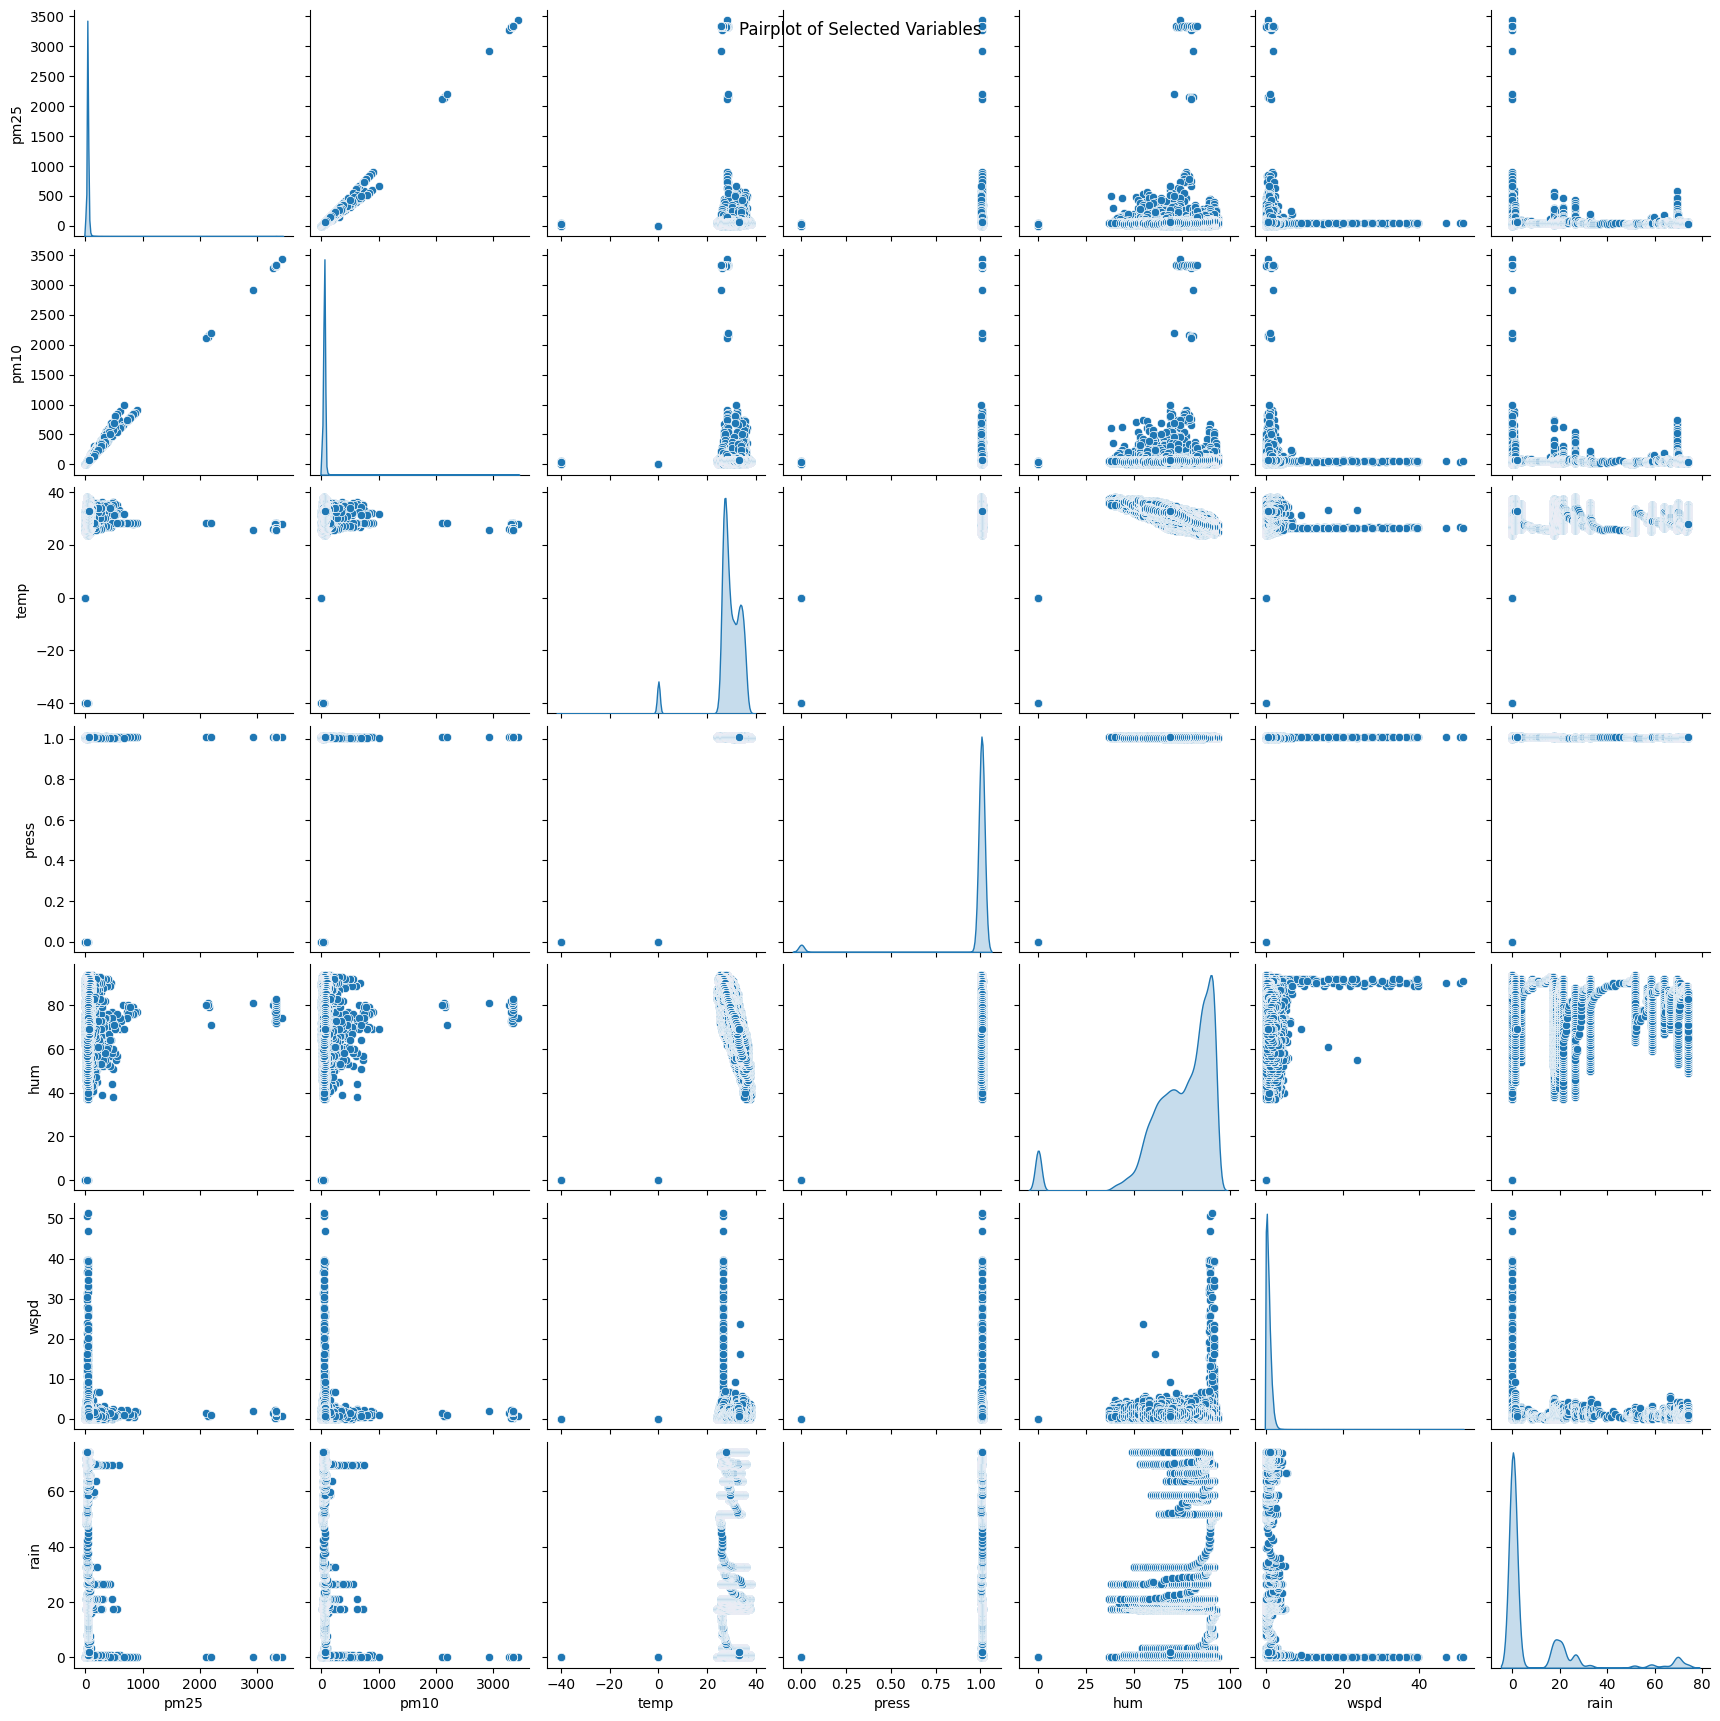

In [16]:
# Pairplot for selected variables
selected_variables = ['pm25','pm10', 'temp','press' ,'hum', 'wspd', 'rain']
sns.pairplot(data[selected_variables], diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables')
plt.show()

**Conclusion:**
>
>- From The correlation Heatmap and pairplot it can be seen that there is a very strong positive correlation between PM2.5 and PM10, indicating that as the concentration of PM2.5 increases, PM10 concentration also increases
>- Also, there is a strong negative correlation between temperature and humidity.

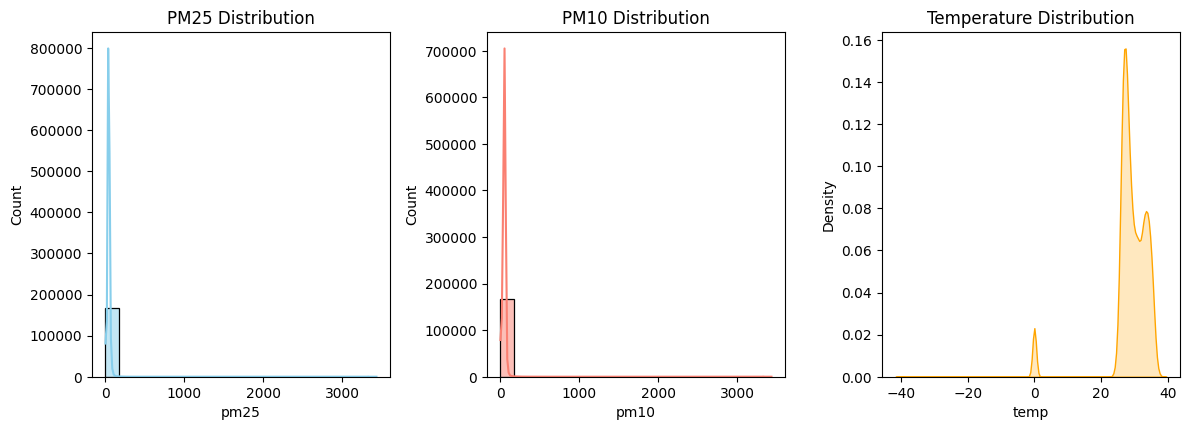

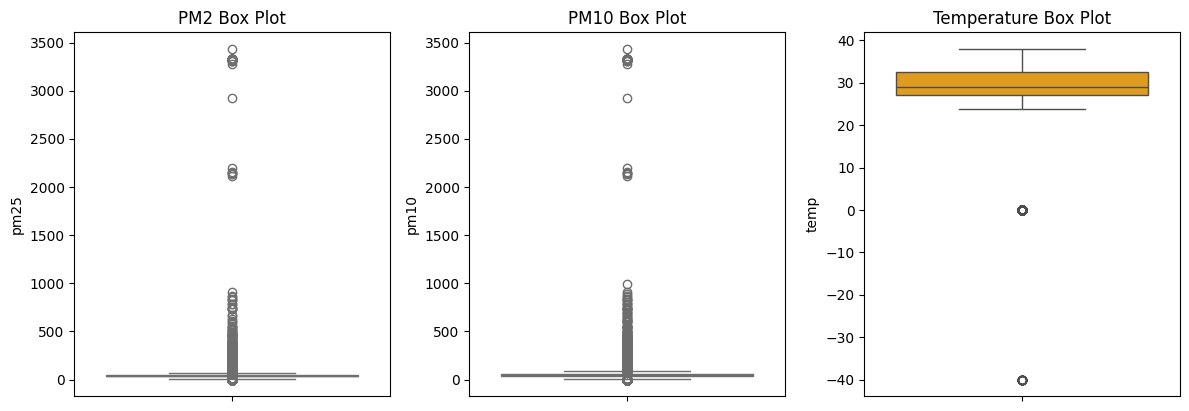

In [17]:
plt.figure(figsize=(12, 8))

# Histograms
plt.subplot(2, 3, 1)
sns.histplot(df['pm25'], kde=True, bins=20, color='skyblue')
plt.title('PM25 Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['pm10'], kde=True, bins=20, color='salmon')
plt.title('PM10 Distribution')


# KDE plots
plt.subplot(2, 3, 3)
sns.kdeplot(df['temp'], shade=True, color='orange')
plt.title('Temperature Distribution')

plt.tight_layout()
plt.show()





# Box plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(y=df['pm25'], color='skyblue')
plt.title('PM2 Box Plot')

plt.subplot(2, 3, 2)
sns.boxplot(y=df['pm10'], color='salmon')
plt.title('PM10 Box Plot')


plt.subplot(2, 3, 3)
sns.boxplot(y=df['temp'], color='orange')
plt.title('Temperature Box Plot')





plt.tight_layout()
plt.show()

>**Conclusion:** Based on the data visualisation it can be seen that we have outliers in pm25 and pm 10 which might not be good for a regression model

## Handling Outliers


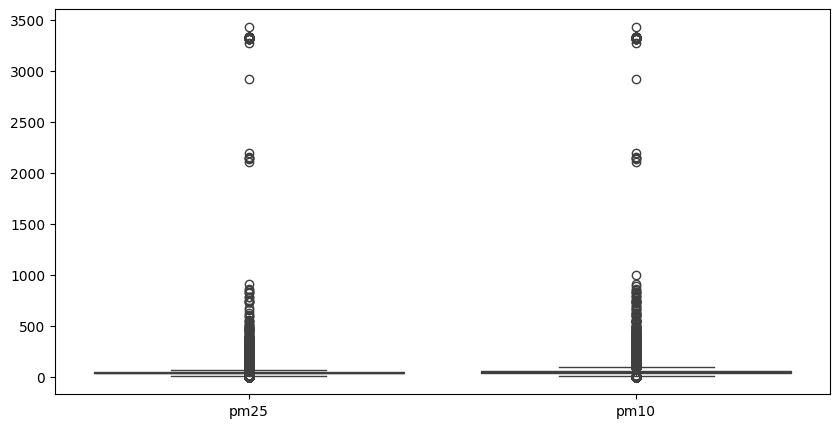

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['pm25', 'pm10']])
plt.show()


In [19]:
Q1_pm25 = df['pm25'].quantile(0.25)
Q3_pm25 = df['pm25'].quantile(0.75)
IQR_pm25 = Q3_pm25 - Q1_pm25

Q1_pm10 = df['pm10'].quantile(0.25)
Q3_pm10 = df['pm10'].quantile(0.75)
IQR_pm10 = Q3_pm10 - Q1_pm10

outliers_pm25 = df[(df['pm25'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (df['pm25'] > (Q3_pm25 + 1.5 * IQR_pm25))]
outliers_pm10 = df[(df['pm10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (df['pm10'] > (Q3_pm10 + 1.5 * IQR_pm10))]


In [20]:
# df_clean = df[~((df['pm25'] < (Q1_pm25 - 1.5 * IQR_pm25)) | (df['pm25'] > (Q3_pm25 + 1.5 * IQR_pm25)) |
#                 (df['pm10'] < (Q1_pm10 - 1.5 * IQR_pm10)) | (df['pm10'] > (Q3_pm10 + 1.5 * IQR_pm10)))]


In [21]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 5))
# sns.boxplot(data=df_clean[['pm25', 'pm10']])
# plt.show()


>**Conclusion:** Outliers has been removed and thus we can proceed to build  regression models  with the available data

In [22]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain
count,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000
mean,42.045128,49.424641,28.920174,74.322283,0.974792,0.729745,147.654846,9.222369
std,54.281286,55.789973,6.144425,18.324413,0.177946,0.826272,103.225112,17.979483
min,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,38.000000,27.100000,66.000000,1.006000,0.300000,73.000000,0.000000
50%,41.000000,49.000000,28.900000,79.000000,1.007000,0.600000,113.000000,0.000000
75%,48.000000,60.000000,32.600000,87.000000,1.009000,1.000000,213.000000,17.400000
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,51.300000,359.000000,74.200000


***Normalise PM25 into a normal ditibution by taking it log function***

Skewness: 51.233390
Kurtosis: 3024.073476


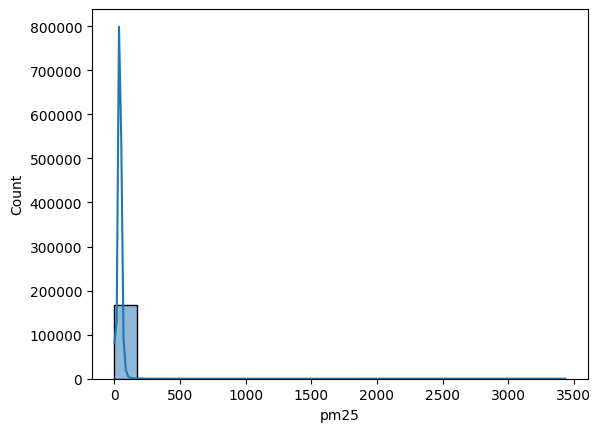

In [23]:
sns.histplot(data['pm25'],kde=True,bins=20)

print("Skewness: %f" % data['pm25'].skew())
print("Kurtosis: %f" % data['pm25'].kurt())

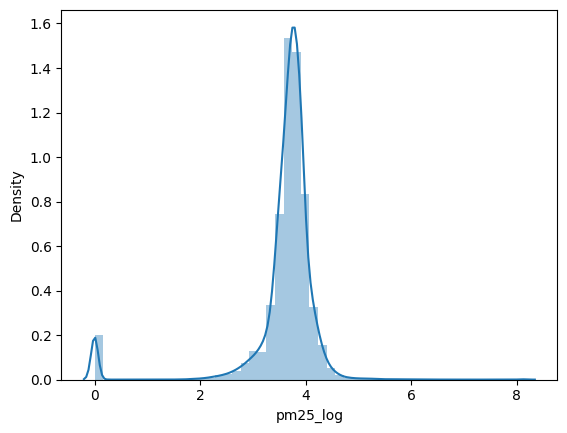

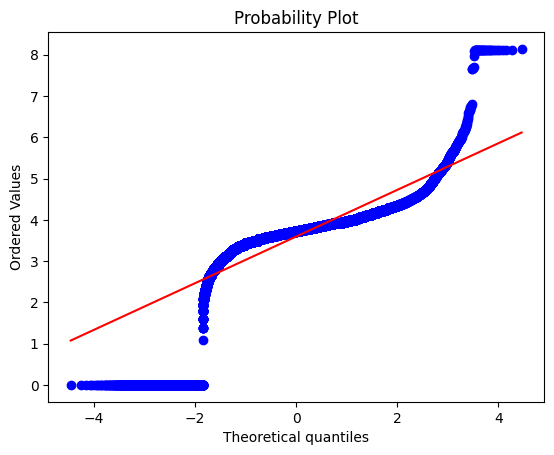

In [24]:
from scipy import stats
#applying log transformation
# df['pm25_log'] = np.log(df['pm25'])
df['pm25_log'] = np.log1p(df['pm25'])  # log1p is log(1 + x), avoids issues with zero

#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(df['pm25_log'],);
fig = plt.figure()
res = stats.probplot(df['pm25_log'], plot=plt)

In [25]:
df.describe()

,pm25,pm10,temp,hum,press,wspd,wdir,rain,pm25_log
count,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000,167412.000000
mean,42.045128,49.424641,28.920174,74.322283,0.974792,0.729745,147.654846,9.222369,3.595608
std,54.281286,55.789973,6.144425,18.324413,0.177946,0.826272,103.225112,17.979483,0.744533
min,0.000000,0.000000,-40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,38.000000,27.100000,66.000000,1.006000,0.300000,73.000000,0.000000,3.526361
50%,41.000000,49.000000,28.900000,79.000000,1.007000,0.600000,113.000000,0.000000,3.737670
75%,48.000000,60.000000,32.600000,87.000000,1.009000,1.000000,213.000000,17.400000,3.891820
max,3435.000000,3435.000000,38.000000,94.000000,1.014000,51.300000,359.000000,74.200000,8.142063


## Feature selection

In [26]:
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [27]:
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """

    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))

    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]

    return X_train, X_test, y_train, y_test

In [28]:
def prepareData(series, test_size,lags=None,timeseries='timeseries',target_encoding=False):


    # copy of the initial dataset
    data = pd.DataFrame(series.copy(deep=True))
    # data.columns = ["y"]



    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["minutes"]=data.index.minute

    # # Example: Rolling mean for PM2.5
    data['pm25_rolling_mean'] = data['pm25_log'].rolling(window=30).mean()



    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        # data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "pm25").get, data.hour))
        data["min_average"] = list(map(code_mean(data[:test_index], 'minutes', "pm25").get, data.hour))

        # frop encoded variables
        data.drop(["hour"], axis=1, inplace=True)
        data.drop(["minutes"], axis=1, inplace=True)


      # train-test split
    y = data.dropna().pm25_log
    X = data.dropna().drop(['pm25','pm25_log'], axis=1)
    if timeseries=='timeseries':
      X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)
    elif timeseries=='ml':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=2020)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)




    return X_train, X_test, y_train, y_test

In [29]:
def plotModelResults(model, X_train, X_test, y_train, y_test, plot_intervals=False, plot_anomalies=False):
    """
    Plots modelled vs fact values, prediction intervals, and anomalies
    """

    prediction = model.predict(X_test)
    print(y_test.shape)
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)

    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train,
                                    cv=tscv,
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()

        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")

    error = mean_absolute_percentage_error(prediction, y_test)
    if np.isinf(error):  # If error is infinite, switch to mean squared error
        error = mean_squared_error(prediction, y_test)
        plt.title("Mean squared error: {:.2f}".format(error))
    else:
        plt.title("Mean absolute percentage error: {:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)


def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    plt.title('Regression Feature Importances ')

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plotRegression(y_test, y_pred):
    """
    Plots a regression plot of actual vs predicted values with a regression line.
    """

    # Revert the log transformation
    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.3)

    # Plot regression line
    regression_line = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, np.polyval(regression_line, y_test), color='green', linewidth=2.0, label='Regression Line')

    # Adjust x and y axis limits to avoid cutting off data
    plt.xlim([min(y_test), max(y_test) * 1.05])
    plt.ylim([min(y_pred), max(y_pred) * 1.05])

    plt.title('Regression Plot: Actual vs Predicted PM2.5 Concentration')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()




In [31]:
def plot_residual(y_test,y_pred):
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot residuals against predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, color='blue', alpha=0.2)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot f')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plotRegression_result(y_test, y_pred):

    """
    Plots a regression plot of actual vs predicted values with additional visualizations.
    """

    plt.figure(figsize=(18, 10))

    # Scatter Plot
    plt.subplot(2, 3, 1)
    plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.5)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')
    plt.legend()

    # Plot regression line
    regression_line = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, np.polyval(regression_line, y_test), color='green', linewidth=2.0, label='Regression Line')
    plt.legend()

    # Residual Plot
    plt.subplot(2, 3, 2)
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='red', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted PM2.5 Concentration')
    plt.ylabel('Residuals')

    # Distribution Plot of Residuals
    plt.subplot(2, 3, 3)
    sns.histplot(residuals, kde=True, color='orange')
    plt.title('Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Coefficient of Determination (R^2)
    r_squared = np.corrcoef(y_test, y_pred)[0, 1] ** 2
    plt.text(0.05, 0.95, f'$R^2$ = {r_squared:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
    mae = np.mean(np.abs(residuals))
    mse = np.mean(residuals ** 2)
    rmse = np.sqrt(mse)
    plt.text(0.05, 0.85, f'MAE = {mae:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.75, f'MSE = {mse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.05, 0.65, f'RMSE = {rmse:.3f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    # Line of Perfect Prediction
    plt.plot(y_test, y_test, color='gray', linestyle='--', label='Perfect Prediction')
    plt.legend()

    # Confidence Intervals for the Regression Line
    plt.subplot(2, 3, 4)
    sns.regplot(x=y_test, y=y_pred, ci=95, scatter_kws={'color': 'blue', 'alpha': 0.5}, line_kws={'color': 'green', 'linewidth': 2})
    plt.title('Regression Plot with Confidence Intervals')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')

    # Scatter Density Plot
    plt.subplot(2, 3, 5)
    sns.kdeplot(x=y_test, y=y_pred, cmap='Blues', shade=True, shade_lowest=False)
    plt.title('Scatter Density Plot')
    plt.xlabel('Actual PM2.5 Concentration')
    plt.ylabel('Predicted PM2.5 Concentration')

    plt.tight_layout()
    plt.show()


In [33]:
def mean_absolute_percentage_error(y_true, y_pred, threshold=1e-5):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Replace zero values in y_true with threshold
    y_true[np.abs(y_true) < threshold] = threshold
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [34]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse=np.sqrt(mse)
    return mae, mse, r2,rmse

In [35]:
# the results by train set and test set are rather different, to see it
def plot_prediction(label=None, prediction=None,title=None, limit=200):
    plt.figure(figsize=(14,6))
    plt.plot(label.to_list(),label='Actual')
    plt.plot(prediction, 'ro',label='Predicted')
    plt.xlim(0, limit)
    plt.title(f'{title} Actual vs Predicted')
    plt.legend()
    return None

## Split features (meteorological inputs with PM<sub>10</sub>) and label (PM<sub>2.5</sub>)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:

X_train, X_test, y_train, y_test = prepareData(df.copy(), test_size=0.2,target_encoding=False,timeseries='ml')

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Save the scaler
joblib.dump(scaler, r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\scaler.pkl')

['C:\\Users\\acer\\Documents\\PROJECTS\\New CODE WORKS\\JAn24\\Dustpredict\\softcopy\\Dust-Particle-Control-System\\scaler.pkl']

In [39]:
len(X_train_scaled), len(y_test)

(133906, 33477)

# Linear Regression

In [38]:
# Linear regression is the simplest form of data learning, let try this first
from sklearn.linear_model import LinearRegression

In [39]:
# make an instant of the class
lin_reg = LinearRegression()

In [40]:
# and training the model using the _train dataset
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
# let see the output of the mode
lin_reg.coef_

array([ 8.93524527e-02,  1.05501482e-02,  1.24365766e-02,  5.95098460e-02,
       -1.94598961e-03,  4.79331004e-03,  2.82651248e-03, -1.24151698e-03,
       -3.68076253e-04,  6.21118644e-01])

\

## evaluate model performance

In [43]:
# predict based on the training set
y_train_prd = lin_reg.predict(X_train_scaled)

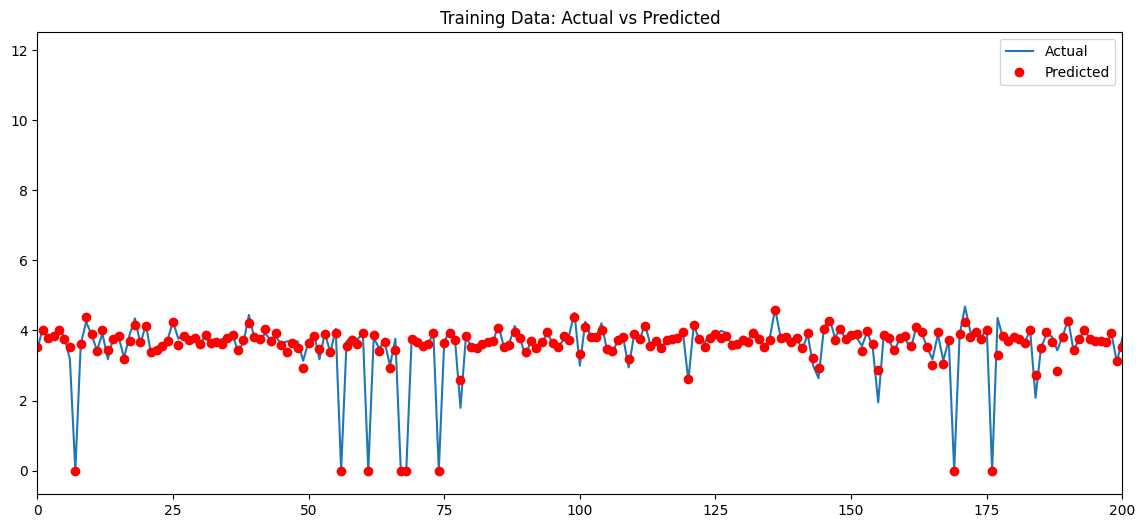

In [44]:
plot_prediction(y_train,y_train_prd,title='Training Data:')

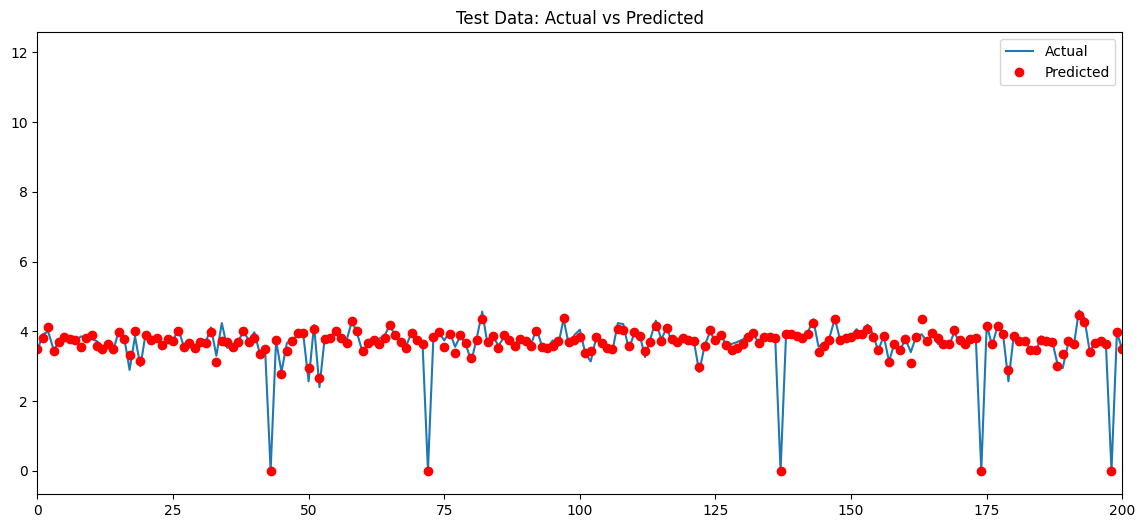

In [45]:


# more important, how about with validation set (test set)
y_test_prd = lin_reg.predict(X_test_scaled)


plot_prediction(y_test,y_test_prd,title='Test Data:')


(33477,)


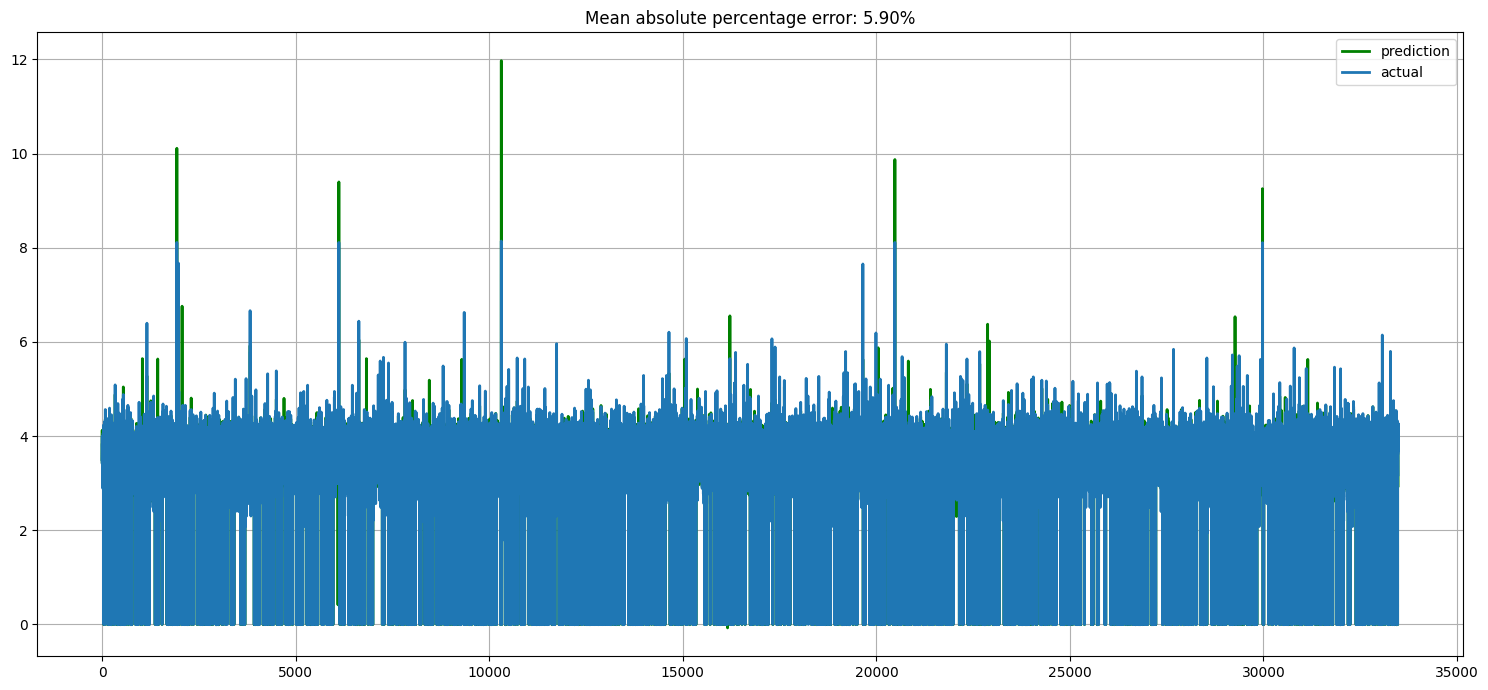

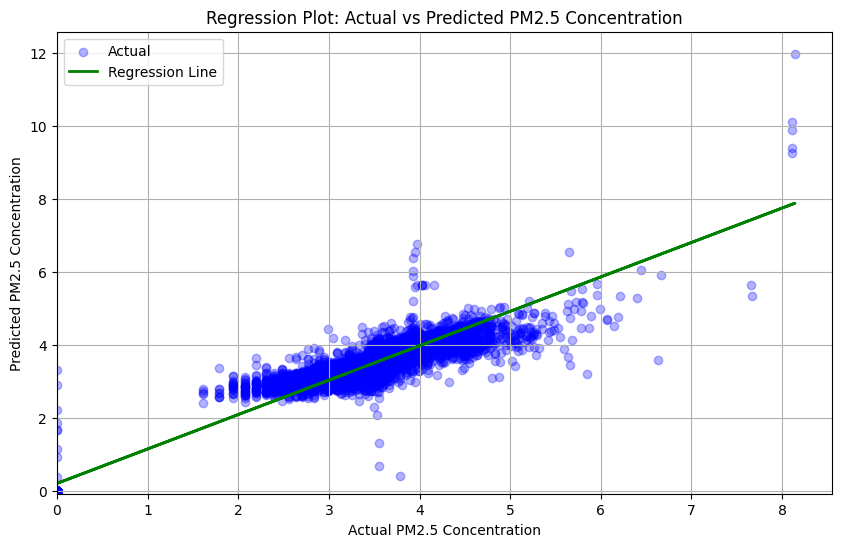

In [46]:
plotModelResults(lin_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
# plotCoefficients(lin_reg)
plotRegression(y_test, lin_reg.predict(X_test_scaled))

In [47]:
# for numeric data, one simple way to to see how far
# between the prediction and the garget
from sklearn.metrics import mean_squared_error

In [48]:
# on training set
lin_train_mae, lin_train_mse, lin_train_r2,lin_train_rmse = evaluate_model(y_train, y_train_prd)
print('Trainset:RMSE', lin_train_rmse,end="\n")
print('Trainset: MSE',lin_train_mse,end="\n")
print('Trainset: MAE',lin_train_mae,end="\n")
print('Trainset: R2',lin_train_r2,end="\n")

Trainset:RMSE 0.1746070633143252
Trainset: MSE 0.030487626559252776
Trainset: MAE 0.09455295875805303
Trainset: R2 0.9449704574775011


In [49]:
# on test set
lin_test_mae, lin_test_mse, lin_test_r2, lin_test_rmse = evaluate_model(y_test, y_test_prd)
print('Testset:RMSE', lin_test_rmse,end="\n")
print('Testset: MSE',lin_test_mse,end="\n")
print('Testset: MAE',lin_test_mae,end="\n")
print('Testset: R2',lin_test_r2,end="\n")

Testset:RMSE 0.17513302090025
Testset: MSE 0.030671575009647404
Testset: MAE 0.09509509710321551
Testset: R2 0.9448347486149264


In [50]:
# the average value label set (y set)
y=df['pm25_log']
y.mean()

np.float64(3.5956081865570706)

In [51]:
# relative error
print(f'Relative Error: {100*np.sqrt(lin_test_mse)/y.mean():.0f}%')

Relative Error: 5%


In [52]:
results = dict()
def add_stats(model=None, train_rmse=None, test_rmse=None):
    global results
    results[model] = {'train_rmse': round(train_rmse,1),
                     'test_rmse': round(test_rmse, 1)}
    return None

In [53]:
add_stats(model='linear reg',
         train_rmse=np.sqrt(lin_train_mse),
         test_rmse=np.sqrt(lin_test_mse))


results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)}}

In [54]:
# Assuming 'model' is your trained Linear Regression model
coefficients = lin_reg.coef_  # Array of coefficients (β1, β2, ..., βn)
intercept = lin_reg.intercept_  # Intercept term (β0)

### Linear Regression Mathematical expression

### General Formula:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$



### Explanation:
- **\( y \)**: Predicted output.
- **\( x_i \)**: Features/inputs.
- **( $\beta_i$)**: Coefficients (weights) that the model learns.
- **\( $\epsilon $)**: Error term or residual.


### Trained Model Formula:
$$
y = 3.5962 + (0.0894 \cdot \text{pm10}) + (0.0106 \cdot \text{temp}) + (0.0124 \cdot \text{hum}) + (0.0595 \cdot \text{press}) - (0.0019 \cdot \text{wspd}) + (0.0048 \cdot \text{wdir}) + (0.0028 \cdot \text{rain}) - (0.0012 \cdot \text{hour}) - (0.0004 \cdot \text{minutes}) + (0.6211 \cdot \text{pm25_rolling_mean})
$$


# Xgboost model

In [55]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
xgb_reg.feature_importances_

array([1.22997455e-01, 8.66903603e-01, 1.28813891e-03, 1.88403146e-03,
       2.95031525e-04, 3.36322846e-04, 3.49273934e-04, 5.00238081e-03,
       5.51816600e-04, 3.91952373e-04], dtype=float32)

In [57]:
xgb_ytrain_d = xgb_reg.predict(X_train_scaled)

## evaluate model performance

In [58]:
xgb_ytrain_d = xgb_reg.predict(X_train_scaled)
# on training set
xgb_train_mae, xgb_train_mse, xgb_train_r2,xgb_train_rmse = evaluate_model(y_train, xgb_ytrain_d)
print('Trainset:RMSE', xgb_train_rmse,end="\n")
print('Trainset: MSE',xgb_train_mse,end="\n")
print('Trainset: MAE',xgb_train_mae,end="\n")
print('Trainset: R2',xgb_train_r2,end="\n")

Trainset:RMSE 0.029514672670170466
Trainset: MSE 0.0008711159028273074
Trainset: MAE 0.020548002932548805
Trainset: R2 0.9984276536081451


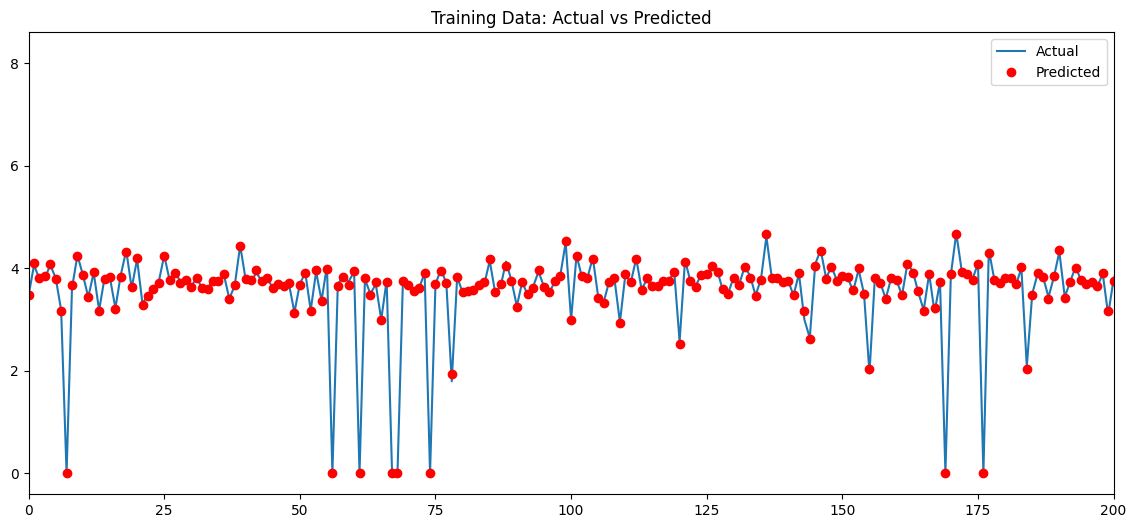

In [59]:
plot_prediction(y_train, xgb_ytrain_d,title='Training Data:')

In [60]:
xgb_ytest_d = xgb_reg.predict(X_test_scaled)

In [61]:
# on test set
xgb_test_mae, xgb_test_mse, xgb_test_r2,xgb_test_rmse = evaluate_model(y_test, xgb_ytest_d)
print('Testset:RMSE', xgb_test_rmse,end="\n")
print('Testset: MSE',xgb_test_mse,end="\n")
print('Testset: MAE',xgb_test_mae,end="\n")
print('Testset: R2',xgb_test_r2,end="\n")

Testset:RMSE 0.04010486628015224
Testset: MSE 0.0016084002993488919
Testset: MAE 0.02224219537362021
Testset: R2 0.9971071649625589


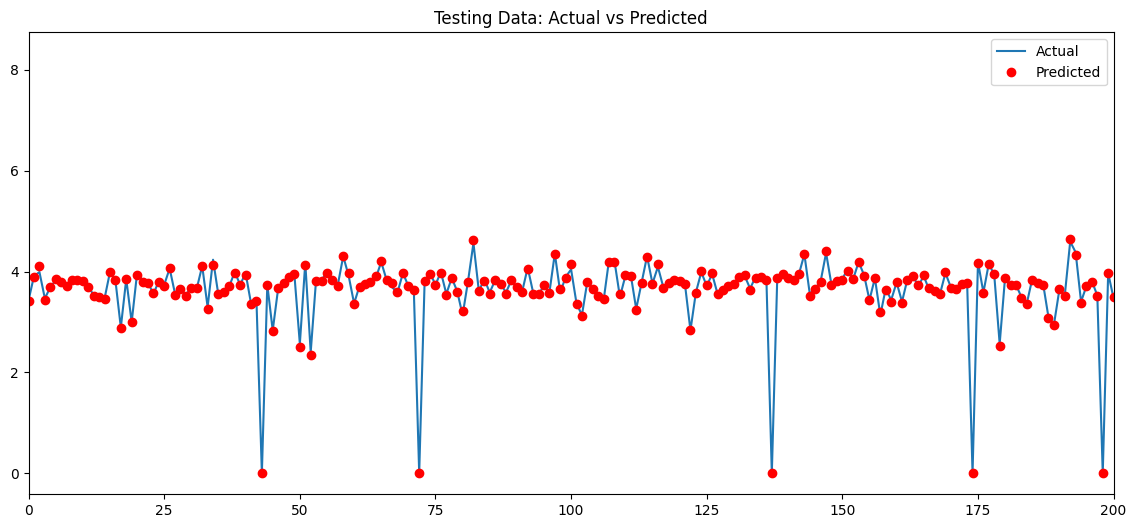

In [62]:
plot_prediction(y_test, xgb_ytest_d,title='Testing Data:')

In [63]:
# let bag the result
add_stats(model='xgb_reg',
         train_rmse=xgb_train_rmse,
         test_rmse=xgb_test_rmse)
results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)},
 'xgb_reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)}}

(33477,)


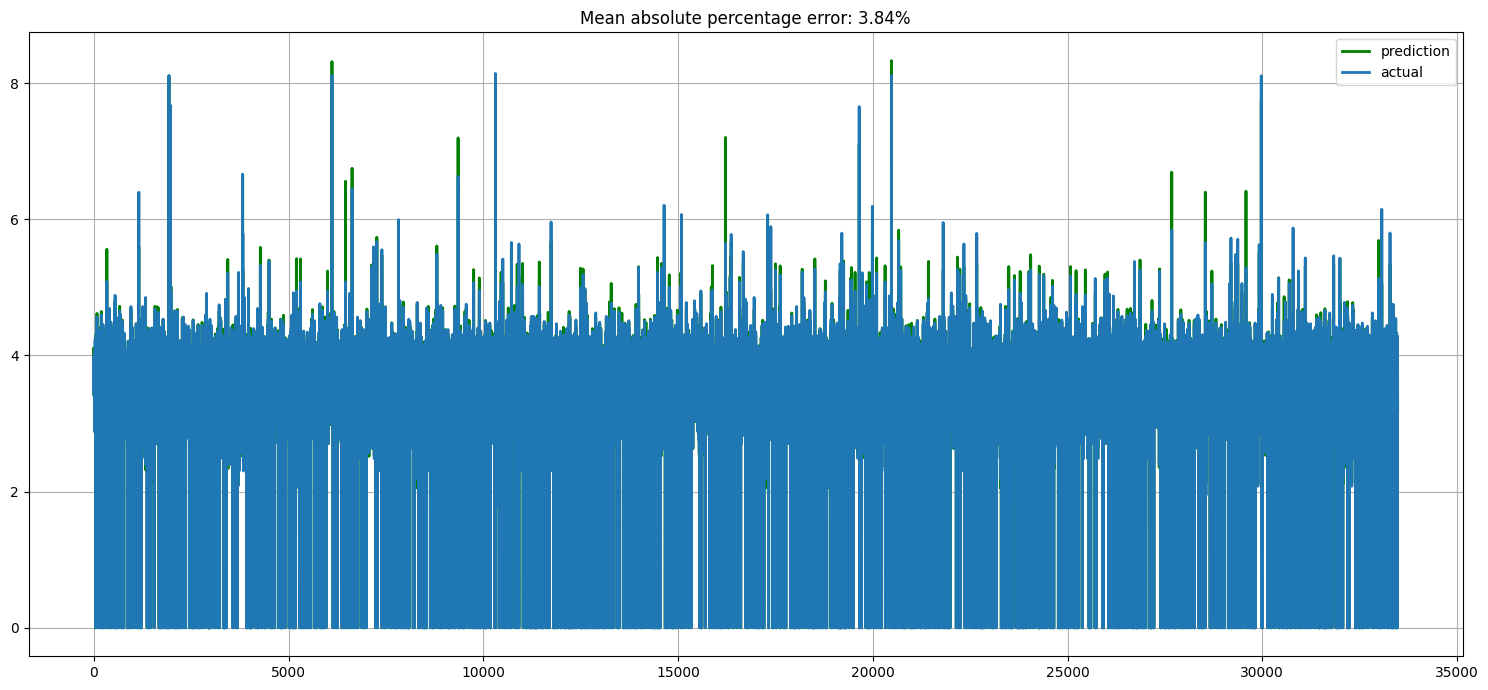

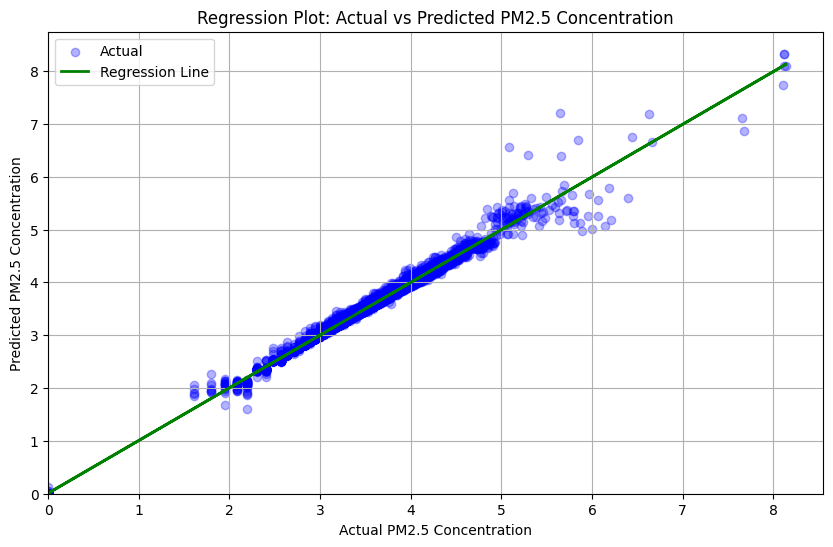

In [64]:
plotModelResults(xgb_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
#plotCoefficients(xgb_reg)
plotRegression(y_test, xgb_reg.predict(X_test_scaled))

## XGBoost Regression Mathematical expression

**XGBoost models are not easily interpretable in terms of a simple mathematical formula.**

In [65]:
# Get feature importance
importance = xgb_reg.get_booster().get_score(importance_type='weight')  # options: 'weight', 'gain', 'cover'


In [66]:
importance

{'f0': 1253.0,
 'f1': 624.0,
 'f2': 353.0,
 'f3': 261.0,
 'f4': 326.0,
 'f5': 484.0,
 'f6': 214.0,
 'f7': 259.0,
 'f8': 368.0,
 'f9': 699.0}

An approximate xgboost regression formula based on feature importance can look something like this:

$$
\hat{y} \approx \beta_0 + \sum_{i=1}^{N} \beta_i \cdot x_i
$$

Where:
- \( $\beta_0 $\) is the initial prediction (or intercept, often the mean of \( y \) in regression),
- \( $\beta_i $\) corresponds to the relative feature importance (scaled appropriately),
- \( $x_i $\) are the input features.


$$
hat{y} = \beta_0 + 1253.0 \cdot \text{pm10} + 624.0 \cdot \text{temp} + 353.0 \cdot \text{hum} + 261.0 \cdot \text{press} + 326.0 \cdot \text{wspd} + 484.0 \cdot \text{wdir} + 214.0 \cdot \text{rain} + 259.0 \cdot \text{hour} + 368.0 \cdot \text{minutes} + 699.0 \cdot \text{pm25_rolling_mean}
$$

# RandomForest

In [67]:
# more powerful model
from sklearn.ensemble import RandomForestRegressor

In [68]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [69]:
forest_reg.feature_importances_

array([9.97977727e-01, 3.68729081e-04, 1.84350162e-04, 1.42745442e-04,
       1.63108681e-04, 2.62750441e-04, 9.07142156e-05, 1.42720287e-04,
       2.08094194e-04, 4.59060120e-04])

## evaluate model performance

In [70]:
forest_ytrain_p = forest_reg.predict(X_train_scaled)

In [71]:
# on training set
rf_train_mae, rf_train_mse, rf_train_r2,rf_train_rmse = evaluate_model(y_train, forest_ytrain_p)
print('Trainset:RMSE', rf_train_rmse,end="\n")
print('Trainset: MSE',rf_train_mse,end="\n")
print('Trainset: MAE',rf_train_mae,end="\n")
print('Trainset: R2',rf_train_r2,end="\n")

Trainset:RMSE 0.011434737602187947
Trainset: MSE 0.00013075322403089098
Trainset: MAE 0.00787026437986902
Trainset: R2 0.9997639931042918


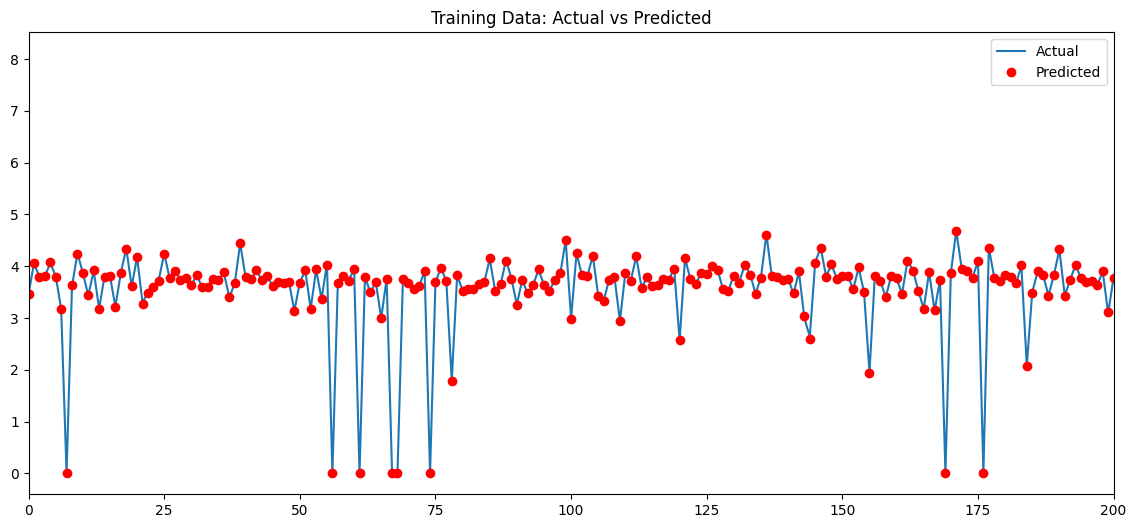

In [72]:
plot_prediction(y_train, forest_ytrain_p,title='Training Data:')

In [158]:
forest_ytest_p = forest_reg.predict(X_test_scaled)

In [159]:
# on test set
rf_test_mae, rf_test_mse, rf_test_r2,rf_test_rmse = evaluate_model(y_test, forest_ytest_p)
print('Testset:RMSE', rf_test_rmse,end="\n")
print('Testset: MSE',rf_test_mse,end="\n")
print('Testset: MAE',rf_test_mae,end="\n")
print('Testset: R2',rf_test_r2,end="\n")

Testset:RMSE 0.030539261814913073
Testset: MSE 0.0009326465121998076
Testset: MAE 0.021126058673128164
Testset: R2 0.9983225615481849


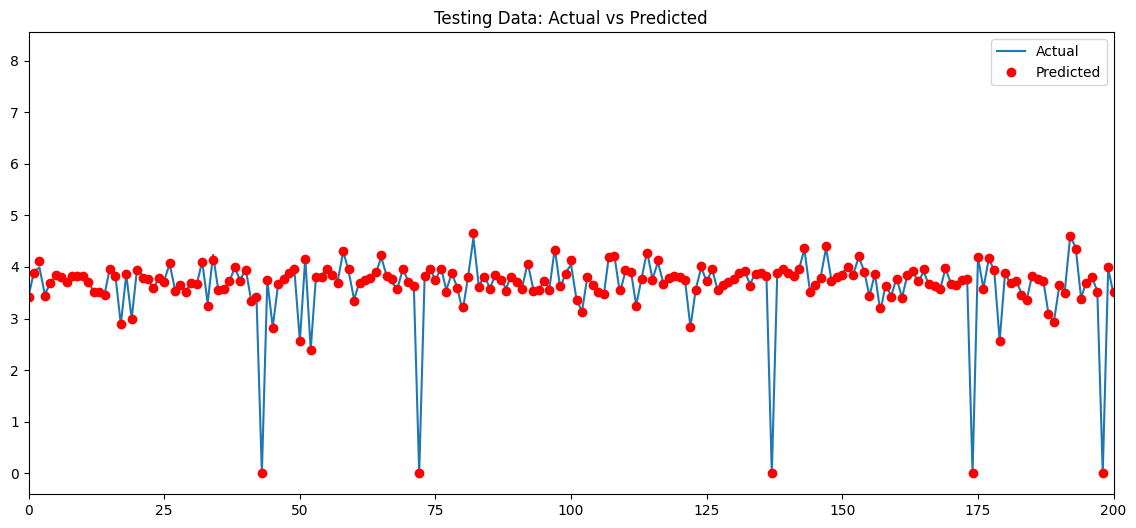

In [160]:
plot_prediction(y_test, forest_ytest_p,title='Testing Data:')

In [161]:
add_stats(model='randomforest reg',
         train_rmse=rf_train_mse,
         test_rmse=rf_test_mse)
results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)},
 'xgb_reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'randomforest reg': {'train_rmse': np.float64(0.0),
  'test_rmse': np.float64(0.0)},
 'Bagging reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)}}

(33477,)


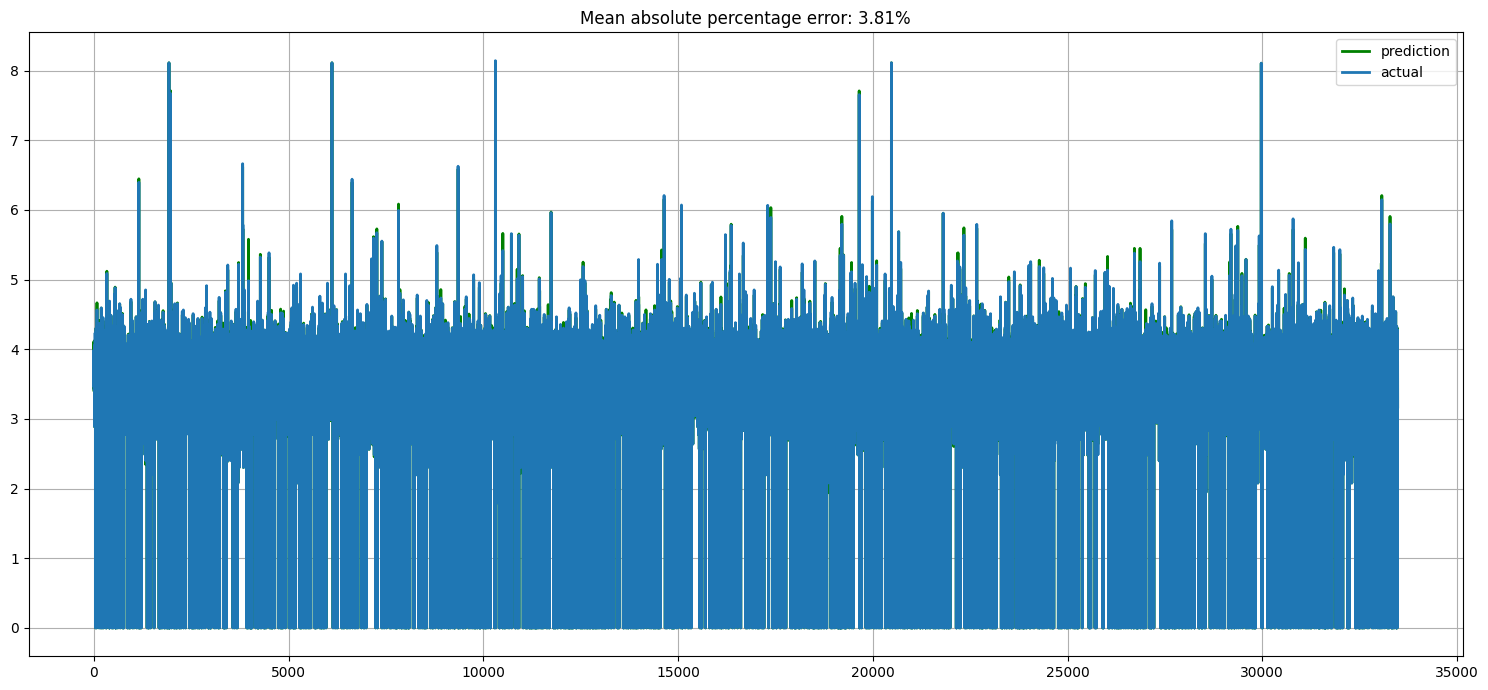

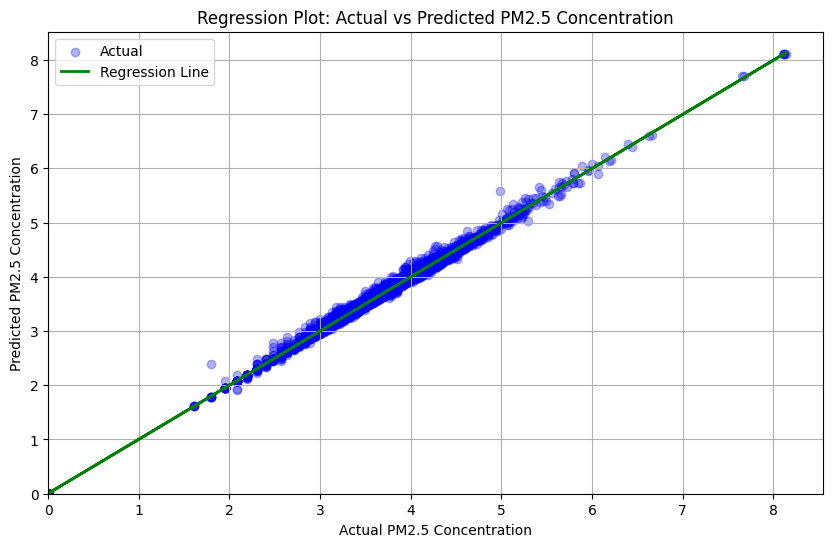

In [162]:
plotModelResults(forest_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
plotRegression(y_test, forest_reg.predict(X_test_scaled))

### Random Forest Regression Formula Using Feature Importance


For a Random Forest regression model, the approximate regression formula using feature importance can be written as:

$$
\hat{y} \approx \beta_0 + \sum_{i=1}^{N} \beta_i \cdot x_i
$$

Where:
- \( $\beta_0 $\) is the intercept, often taken as the mean of \( y \) in the training data,
- \( $\beta_i $\) corresponds to the feature importance score for each feature \( x_i \),
- \( $x_i $\) are the input features.

This approximation reflects the importance of each feature in the prediction but does not capture the exact non-linear relationships modeled by the ensemble of decision trees.


In [163]:
importances = forest_reg.feature_importances_

In [164]:
importances

array([9.97977727e-01, 3.68729081e-04, 1.84350162e-04, 1.42745442e-04,
       1.63108681e-04, 2.62750441e-04, 9.07142156e-05, 1.42720287e-04,
       2.08094194e-04, 4.59060120e-04])

The approximate regression equation using feature importance for the Random Forest model is:

$$
\hat{y} \approx \beta_0 + 0.997978 \cdot \text{pm10} + 0.000368 \cdot \text{temp} + 0.000184 \cdot \text{hum} + 0.000144 \cdot \text{press} + 0.000163 \cdot \text{wspd} + 0.000264 \cdot \text{wdir} + 0.000089 \cdot \text{rain} + 0.000146 \cdot \text{hour} + 0.000208 \cdot \text{minutes} + 0.000457 \cdot \text{pm25_rolling_mean}
$$

Where:
- \( $\beta_0 $\) is the intercept, which can be the mean of the target \( y \) in the training data.


# Bagging regression Model

In [165]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor

In [166]:
bagging_reg = BaggingRegressor()

In [167]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor()

## evaluate model performance

In [168]:
bagging_ytrain_p = bagging_reg.predict(X_train_scaled)

In [169]:
# on training set
bgg_train_mae, bgg_train_mse, bgg_train_r2,bgg_train_rmse = evaluate_model(y_train, bagging_ytrain_p)
print('Trainset:RMSE', bgg_train_rmse,end="\n")
print('Trainset: MSE',bgg_train_mse,end="\n")
print('Trainset: MAE',bgg_train_mae,end="\n")
print('Trainset: R2',bgg_train_r2,end="\n")

Trainset:RMSE 0.013419724025182744
Trainset: MSE 0.00018008899291206693
Trainset: MAE 0.008565479849714997
Trainset: R2 0.9996749430502887


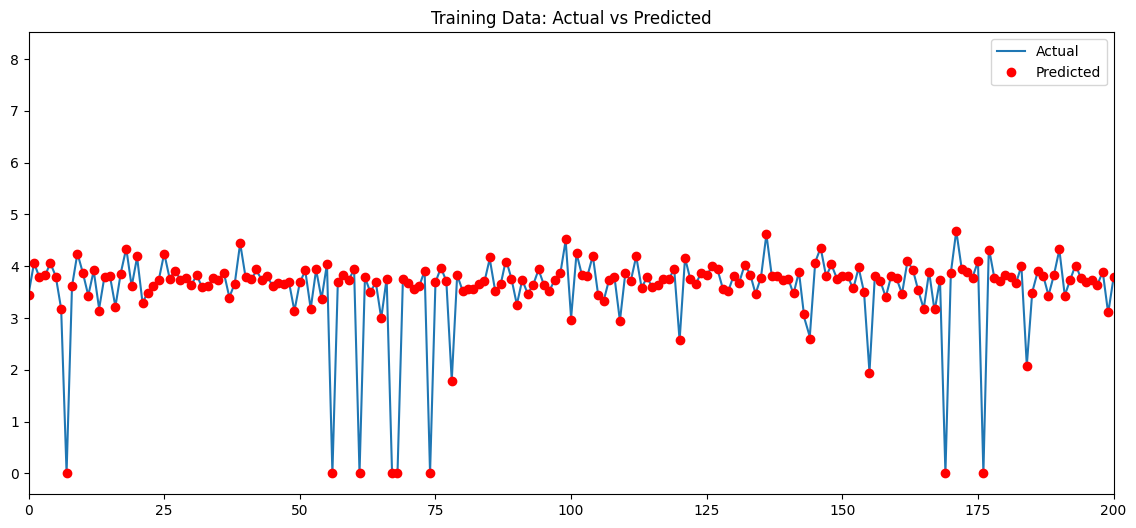

In [170]:
 plot_prediction(y_train, bagging_ytrain_p,title='Training Data:')

In [171]:
bagging_ytest_p = bagging_reg.predict(X_test_scaled)

In [172]:
# on test set
bgg_test_mae, bgg_test_mse, bgg_test_r2,bgg_test_rmse = evaluate_model(y_test, bagging_ytest_p)
print('Testset:RMSE', bgg_test_rmse,end="\n")
print('Testset: MSE',bgg_test_mse,end="\n")
print('Testset: MAE',bgg_test_mae,end="\n")
print('Testset: R2',bgg_test_r2,end="\n")

Testset:RMSE 0.03181618897096951
Testset: MSE 0.0010122698806364417
Testset: MAE 0.02190824495922857
Testset: R2 0.9981793526280511


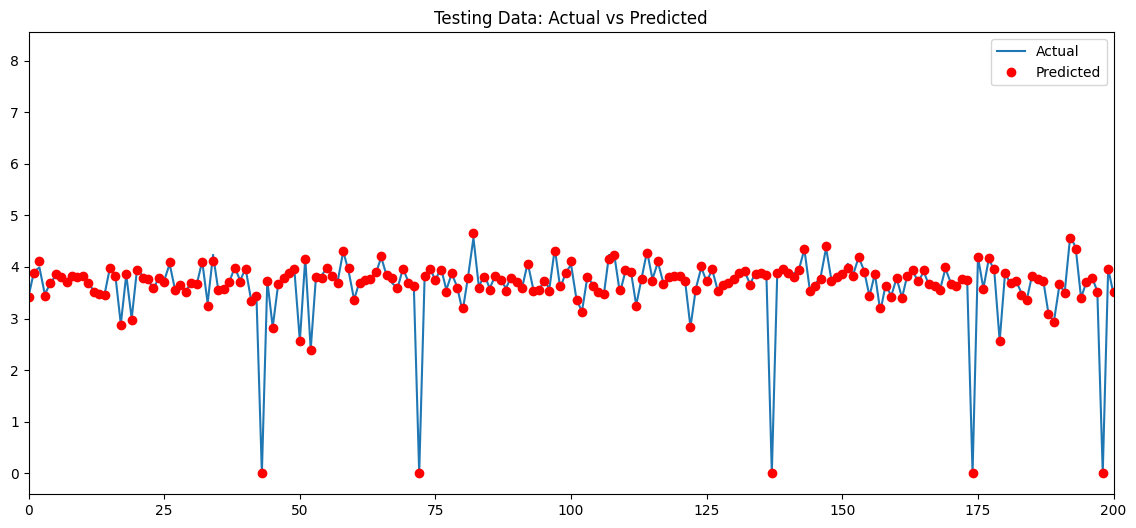

In [173]:
plot_prediction(y_test,bagging_ytest_p,title='Testing Data:')

In [174]:
add_stats(model='Bagging reg',
         train_rmse=bgg_train_rmse,
         test_rmse=bgg_test_rmse)
results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)},
 'xgb_reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'randomforest reg': {'train_rmse': np.float64(0.0),
  'test_rmse': np.float64(0.0)},
 'Bagging reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)}}

(33477,)


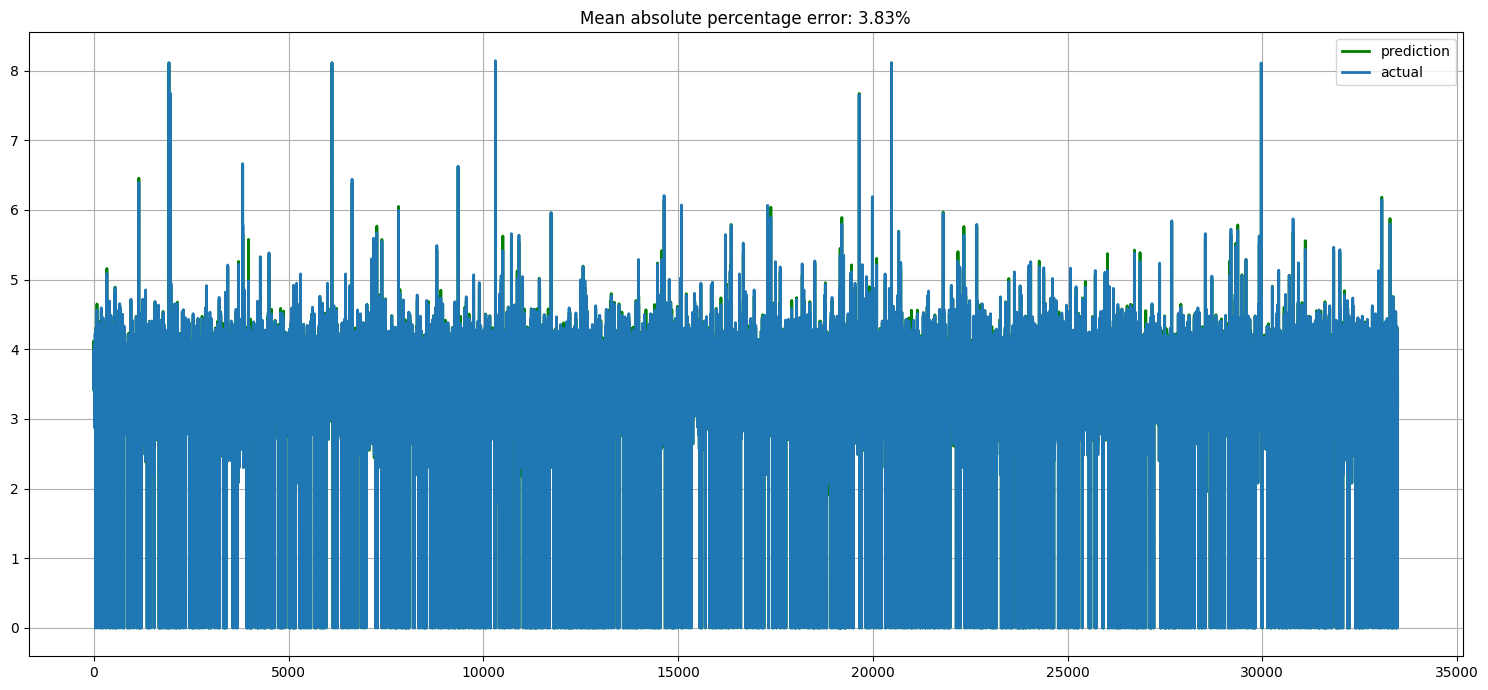

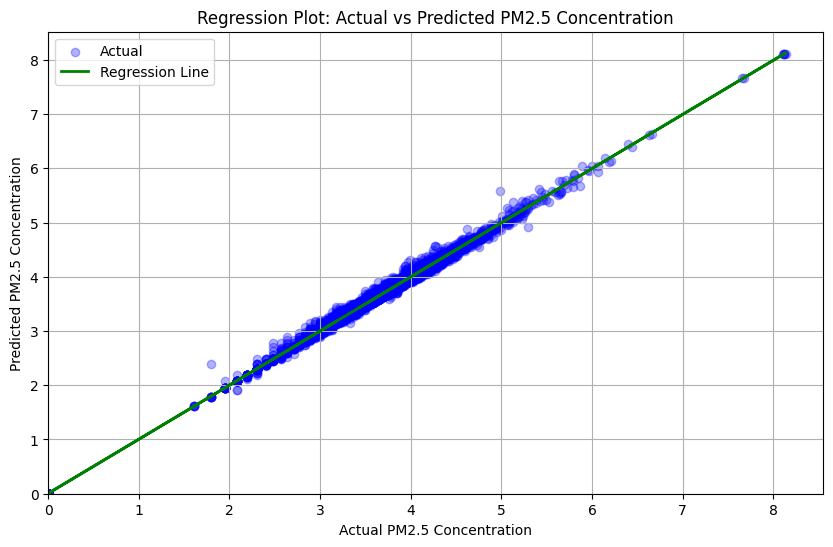

In [175]:
plotModelResults(bagging_reg,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
plotRegression(y_test, bagging_reg.predict(X_test_scaled))

## Bagging regression Regression Formula Using Feature Importance

In [176]:
# Calculate feature importances by averaging across all base estimators
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_reg.estimators_], axis=0)


In [177]:
feature_importances

array([9.97990424e-01, 3.70241526e-04, 1.83615683e-04, 1.38960783e-04,
       1.60697928e-04, 2.60194151e-04, 8.93316525e-05, 1.43930286e-04,
       2.02662682e-04, 4.59941678e-04])

The approximate regression equation using feature importance for the Bagging Regressor model is:

$$
\hat{y} \approx \beta_0 + 0.997980 \cdot \text{pm10} + 0.000366 \cdot \text{temp} + 0.000188 \cdot \text{hum} + 0.000141 \cdot \text{press} + 0.000164 \cdot \text{wspd} + 0.000266 \cdot \text{wdir} + 0.000089 \cdot \text{rain} + 0.000141 \cdot \text{hour} + 0.000210 \cdot \text{minutes} + 0.000455 \cdot \text{pm25\_rolling\_mean}
$$

Where:
- \( $\beta_0 $\) is the intercept, which can be the mean of the target \( y \) in the training data.


# Cross validation

In [178]:
from sklearn.model_selection import cross_val_score

In [179]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

**Models validation on Training data**

In [95]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error'):
    results = {
        'Model': [],
        'Scores': [],
        'Mean': [],
        'Standard Deviation': []
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        results['Model'].append(name)
        results['Scores'].append(scores)
        results['Mean'].append(mean_score)
        results['Standard Deviation'].append(std_score)

        print(f"{name}:")
        print(f"Scores:  {scores}")
        print(f"Mean:  {mean_score}")
        print(f"Standard Deviation:  {std_score}")
        print("-" * 40)

    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
models = {
    'Linear Regression': lin_reg,
    'XGBoost Regressor': xgb_reg,
    'Random Forest Regressor': forest_reg,
    'Bagging Regressor': bagging_reg
}

results_df1 = evaluate_models(models, X_train_scaled, y_train)



Linear Regression:
Scores:  [-0.03310247 -0.02799579 -0.02716594 -0.03191555 -0.03089241 -0.03039496
 -0.03200604 -0.0303466  -0.02986291 -0.03219518]
Mean:  -0.030587785743584346
Standard Deviation:  0.0017838939902459837
----------------------------------------
XGBoost Regressor:
Scores:  [-0.00179979 -0.00165589 -0.00129229 -0.00170716 -0.00161109 -0.00143708
 -0.00189459 -0.00188242 -0.0016714  -0.00191403]
Mean:  -0.0016865743230848437
Standard Deviation:  0.0001926581697028702
----------------------------------------



KeyboardInterrupt



In [ ]:
results_df1.drop(columns='Scores').style.background_gradient(cmap="summer")

**models validation on test data**

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_models(models, X_test_scaled, y_test, cv=10, scoring='neg_mean_squared_error'):
    results = {
        'Model': [],
        'Scores': [],
        'Mean': [],
        'Standard Deviation': []
    }

    for name, model in models.items():
        scores = cross_val_score(model, X_test_scaled, y_test, scoring=scoring, cv=cv)
        mean_score = np.mean(scores)
        std_score = np.std(scores)

        results['Model'].append(name)
        results['Scores'].append(scores)
        results['Mean'].append(mean_score)
        results['Standard Deviation'].append(std_score)

        print(f"{name}:")
        print(f"Scores:  {scores}")
        print(f"Mean:  {mean_score}")
        print(f"Standard Deviation:  {std_score}")
        print("-" * 40)

    results_df = pd.DataFrame(results)
    return results_df

# Example usage:
models = {
    'Linear Regression': lin_reg,
    'XGBoost Regressor': xgb_reg,
    'Random Forest Regressor': forest_reg,
    'Bagging Regressor': bagging_reg
}

results_df2 = evaluate_models(models, X_test_scaled, y_test)



In [ ]:
results_df2.drop(columns='Scores').style.background_gradient(cmap="summer")

>**Conclusion**- Base on cross validation of all the models,it looks like the Random Forest Regressor  performs better than the others

# GridsearchCV Hyperparameter Tunning

In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf_Model = RandomForestRegressor()

# Expanded parameter grid for better tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # More trees for better accuracy
    'max_features': ['auto', 'sqrt', 'log2'],  # Different feature selection strategies
    'max_depth': [10, 20, 30, None],  # Limiting depth to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Use RandomizedSearchCV for efficient hyperparameter tuning
rf_Random = RandomizedSearchCV(
    estimator=rf_Model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Verbosity for tracking progress
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all processors for faster computation
)

In [181]:
# Fit the model
rf_Random.fit(X_train_scaled, y_train)
# Get best parameters
best_params = rf_Random.best_params_
print(f'Best parameters: {best_params}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [182]:
# Evaluate the model with the best parameters
train_score = rf_Random.score(X_train_scaled, y_train)

test_score = rf_Random.score(X_test_scaled, y_test)

print(f'Train R²: {train_score:.4f}')
print(f'Test R²: {test_score:.4f}')


Train R²: 0.9996
Test R²: 0.9978


In [183]:
from sklearn.metrics import r2_score

# Predictions on train and test sets
y_train_pred = rf_Random.best_estimator_.predict(X_train_scaled)
y_test_pred = rf_Random.best_estimator_.predict(X_test_scaled)

# R² score for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')


Train R²: 0.999590568043948
Test R²: 0.9978042318562907


## evaluate model performance

In [184]:
# Predictions on train and test sets
grig_ytrain_p = rf_Random.best_estimator_.predict(X_train_scaled)
grig_ytest_p = rf_Random.best_estimator_.predict(X_test_scaled)

In [185]:
grig_ytrain_p = bagging_reg.predict(X_train_scaled)

In [186]:
# on test set
grid_train_mae, grid_train_mse, grid_train_r2,grid_train_rmse = evaluate_model(y_train, grig_ytrain_p)
print('Trainset:RMSE', grid_train_rmse,end="\n")
print('Trainset: MSE',grid_train_mse,end="\n")
print('Trainset: MAE',grid_train_mae,end="\n")
print('Trainset: R2',grid_train_r2,end="\n")

Trainset:RMSE 0.013419724025182744
Trainset: MSE 0.00018008899291206693
Trainset: MAE 0.008565479849714997
Trainset: R2 0.9996749430502887


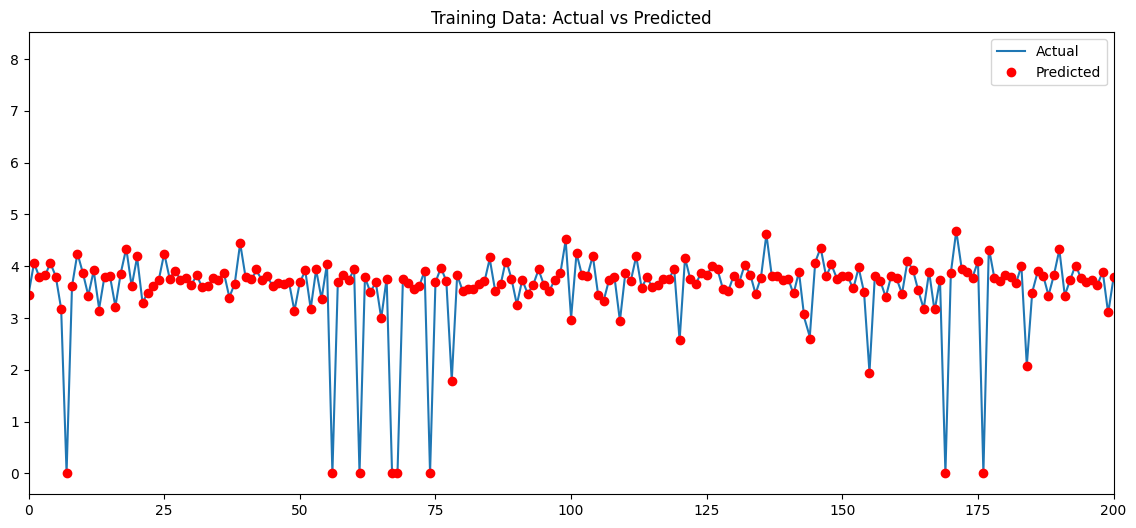

In [187]:
 plot_prediction(y_train, grig_ytrain_p,title='Training Data:')

In [188]:
# on test set
grid_test_mae, grid_test_mse, grid_test_r2,grid_test_rmse = evaluate_model(y_test, grig_ytest_p)
print('Testset:RMSE', grid_test_rmse,end="\n")
print('Testset: MSE',grid_test_mse,end="\n")
print('Testset: MAE',grid_test_mae,end="\n")
print('Testset: R2',grid_test_r2,end="\n")

Testset:RMSE 0.0349404487289497
Testset: MSE 0.0012208349573803623
Testset: MAE 0.021740594474871446
Testset: R2 0.9978042318562907


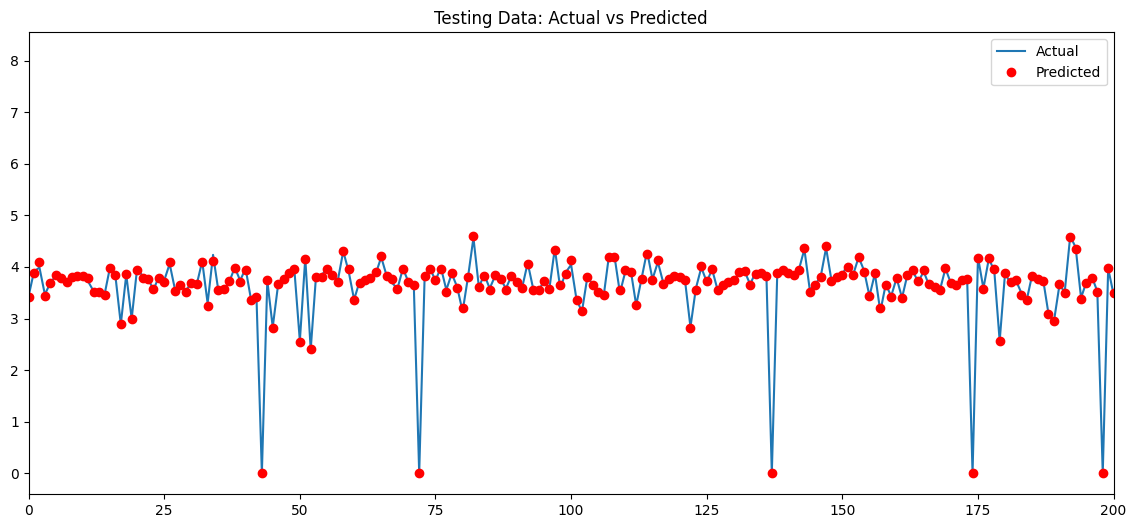

In [189]:
plot_prediction(y_test,grig_ytest_p,title='Testing Data:')

In [190]:
# still in 21 for test set
add_stats(model='GridsearchCV',
         train_rmse=grid_train_rmse,
         test_rmse=grid_test_rmse)
results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)},
 'xgb_reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'randomforest reg': {'train_rmse': np.float64(0.0),
  'test_rmse': np.float64(0.0)},
 'Bagging reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'GridsearchCV': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)}}

(33477,)


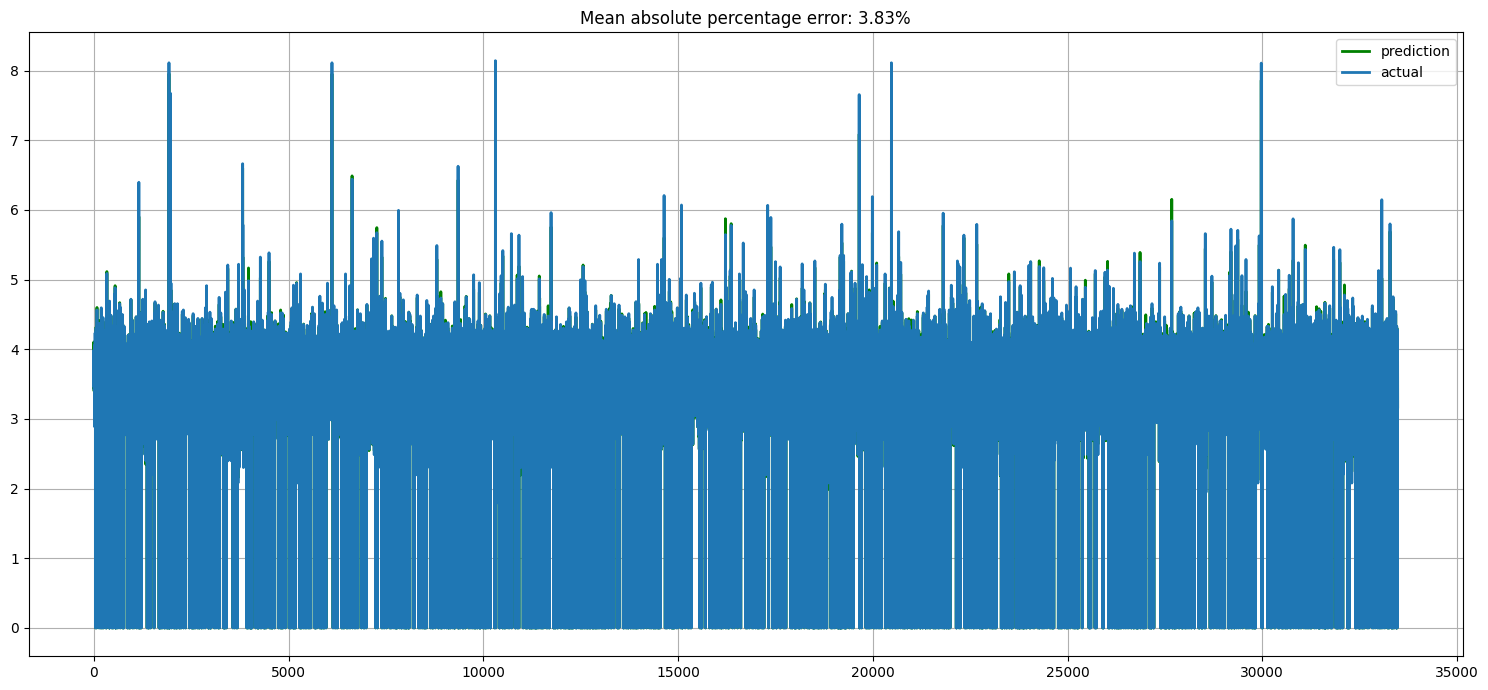

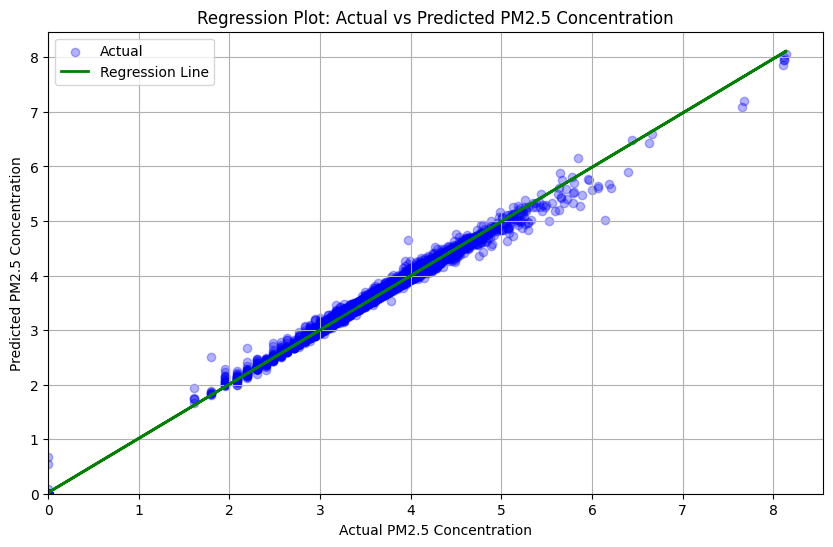

In [191]:
plotModelResults(rf_Random.best_estimator_,X_train=X_train_scaled, X_test=X_test_scaled,y_train=y_train,y_test=y_test, plot_intervals=False)
plotRegression(y_test, rf_Random.best_estimator_.predict(X_test_scaled))

# Ensemble Methods

In [192]:
# let look at a final approach to combine three regression we have so far using Voting method
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

In [193]:
from sklearn.tree import DecisionTreeRegressor

In [194]:
# and make each model as an parameter for then ensemble (voting)

# lin_reg=LinearRegression()

rnd_reg=RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

bag_reg=BaggingRegressor(n_estimators=200, random_state=42)

xgb_reg= XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.2, random_state=42)


In [195]:
# and make each model as an parameter for then ensemble (voting)
voting_reg = VotingRegressor(
    estimators=[('rnd', rnd_reg),
               ('bag', bag_reg),
                ('xgb',xgb_reg),
               ],
)

In [196]:
# train model by the train set
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rnd',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200,
                                                   random_state=42)),
                            ('bag',
                             BaggingRegressor(n_estimators=200,
                                              random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categoric...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=10,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...))])

In [197]:
# check estimator (paramters)
voting_reg.estimators_

[RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42),
 BaggingRegressor(n_estimators=200, random_state=42),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)]

In [198]:
# now we do predicting on the test set
y_entest_p = voting_reg.predict(X_test_scaled)

## Evaluate Model

In [199]:
# we could run on train set
y_entrain_p = voting_reg.predict(X_train_scaled)
mse = mean_squared_error(y_entrain_p, y_train)
en_train = np.sqrt(mse)

In [200]:
# on test set
vm_train_mae, vm_train_mse, vm_train_r2,vm_train_rmse = evaluate_model(y_train, y_entrain_p)
print('Trainset:RMSE', vm_train_rmse,end="\n")
print('Trainset: MSE',vm_train_mse,end="\n")
print('Trainset: MAE',vm_train_mae,end="\n")
print('Trainset: R2',vm_train_r2,end="\n")

Trainset:RMSE 0.01847310703715671
Trainset: MSE 0.00034125568360624875
Trainset: MAE 0.013417772361748851
Trainset: R2 0.9993840404691537


In [201]:
X_train.columns

Index(['pm10', 'temp', 'hum', 'press', 'wspd', 'wdir', 'rain', 'hour',
       'minutes', 'pm25_rolling_mean'],
      dtype='object')

In [202]:
mse = mean_squared_error(y_entest_p, y_test)
en_test = np.sqrt(mse)

In [203]:
# on test set
vm_test_mae, vm_test_mse, vm_test_r2,vm_test_rmse = evaluate_model(y_test, y_entest_p)
print('Testset:RMSE', vm_test_rmse,end="\n")
print('Testset: MSE',vm_test_mse,end="\n")
print('Testset: MAE',vm_test_mae,end="\n")
print('Testset: R2',vm_test_r2,end="\n")

Testset:RMSE 0.03117960381034515
Testset: MSE 0.0009721676937700898
Testset: MAE 0.02080168733443702
Testset: R2 0.9982514795800866


In [204]:
# still in 21 for test set
add_stats(model='voting reg',
         train_rmse=vm_train_rmse,
         test_rmse=vm_test_rmse)
results

{'linear reg': {'train_rmse': np.float64(0.2), 'test_rmse': np.float64(0.2)},
 'xgb_reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'randomforest reg': {'train_rmse': np.float64(0.0),
  'test_rmse': np.float64(0.0)},
 'Bagging reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'GridsearchCV': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)},
 'voting reg': {'train_rmse': np.float64(0.0), 'test_rmse': np.float64(0.0)}}

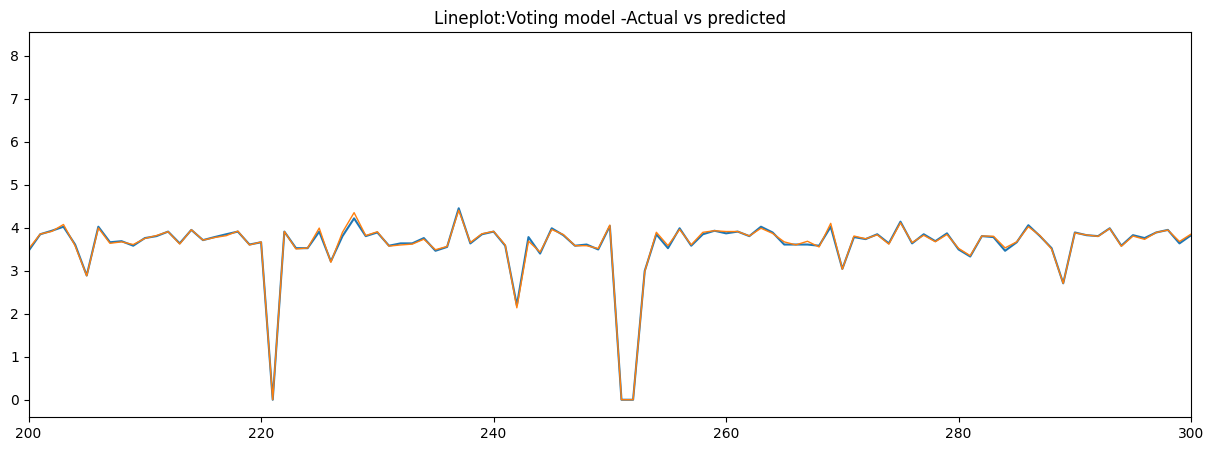

In [205]:
# let visualize the data from Ensemble with test set
plt.figure(figsize=(15,5))
plt.plot(y_test.to_list(),label='Actual')
plt.plot(y_entest_p, lw=1,label='prediction')
plt.xlim(200,300)
plt.title("Lineplot:Voting model -Actual vs predicted")
plt.show()

In [206]:

from random import randint

# time to invest some good graphs
def plot_results(label=None, prediction=None, std_=None, points=100, savefig=False):

    plt.style.use('default')
    plt.rcParams['font.size'] = 12
    start = randint(0, len(label)-points)
    end = start + points
    label_ = label.iloc[start:end]
    pred_ = prediction[start:end]
    xindex = np.arange(0,len(label_),1)

    plt.figure(figsize=(10,6))
    plt.plot(label_.to_list(), 'ko--',lw=0.5, label='measured')
    plt.plot(pred_, lw=1, color='#922B21', label='predicted')
    plt.fill_between(xindex, pred_- std_, pred_+std_,
                    color='#5499C7', alpha=0.6, label = '$\pm1 \sigma$')

    max_ = np.max([label_.max(), np.max(pred_)])
    plt.ylim(0, 1.1*max_)
    plt.ylabel('Concentration, $\mu g/m^3$')
    plt.title('Measured and predicted $PM_{2.5}$ using Ensemble regression',
              y=1.05, weight='bold')
    plt.xlabel('Hour, site: Malaysia, 2024')
    plt.legend(ncol=3)
    if savefig:
        plt.tight_layout()
        plt.savefig(f'img/en_reg_{start}.png',)
    return None

In [207]:
mse = mean_squared_error(y_entrain_p, y_train)
train_std = np.sqrt(mse)
mse, train_std

(np.float64(0.00034125568360624875), np.float64(0.01847310703715671))

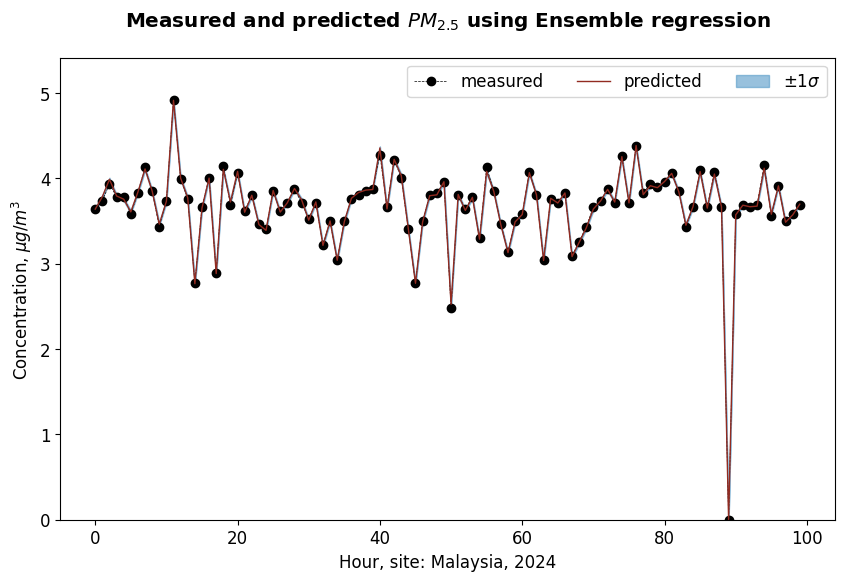

In [208]:
plot_results(label=y_train, prediction=y_entrain_p,
             std_=train_std, savefig=False)

### Testset

In [209]:
y_entest_p = voting_reg.predict(X_test_scaled)
mse = mean_squared_error(y_entest_p, y_test)
test_std = np.sqrt(mse)
mse, test_std

(np.float64(0.0009721676937700898), np.float64(0.03117960381034515))

- not much worse, in fact, with less parameters and get a similar outcome, that is actually encouraging

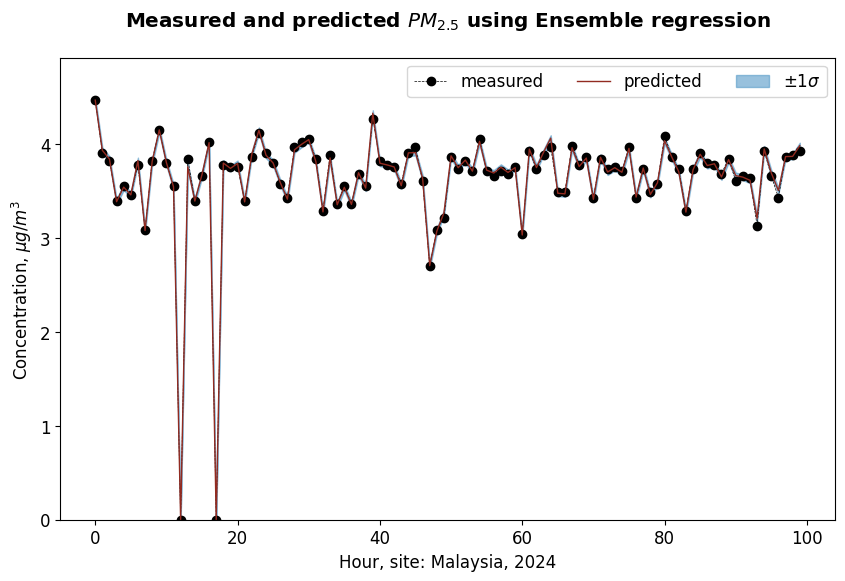

In [210]:
plot_results(label=y_test,
             prediction=y_entest_p, std_=test_std, savefig=False)

In [211]:
feature_names=list(X_train.columns)

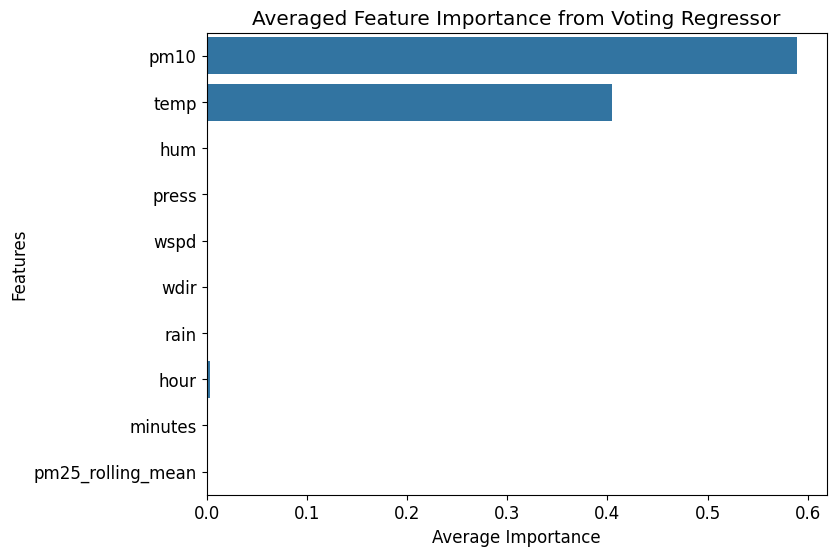

In [212]:
#  Extract feature importances from models that have the 'feature_importances_' attribute
importances = []
for name, est in voting_reg.named_estimators_.items():
    if hasattr(est, 'feature_importances_'):
        importances.append(est.feature_importances_)

# Compute the average feature importance across all models
average_importance = np.mean(importances, axis=0)

# Visualize the averaged feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=average_importance, y=feature_names)
plt.title('Averaged Feature Importance from Voting Regressor')
plt.xlabel('Average Importance')
plt.ylabel('Features')
plt.show()


## Model Evaluation And Result

> RMSE:this is Root Mean Squared Error. If we assumed the errors is random, then the distribution of error to the mean value should be in standard distribution (Gaussian Distribution). Then the RMSE is the Standard Deviation (SD). The ratio of SD to the mean value in percent is called Relative Standard Deviation.

In [213]:
df = pd.DataFrame(data=results)

In [214]:
df

,linear reg,xgb_reg,randomforest reg,Bagging reg,GridsearchCV,voting reg
train_rmse,0.2,0.0,0.0,0.0,0.0,0.0
test_rmse,0.2,0.0,0.0,0.0,0.0,0.0


In [215]:
df2 = df.transpose()

In [216]:
df2

,train_rmse,test_rmse
linear reg,0.2,0.2
xgb_reg,0.0,0.0
randomforest reg,0.0,0.0
Bagging reg,0.0,0.0
GridsearchCV,0.0,0.0
voting reg,0.0,0.0


In [217]:
sns.set_style('whitegrid')

In [218]:
import pandas as pd

# Define the data as a list of dictionaries
data = [
    {'Model': 'Linear Regression', 'Set': 'Training', 'RMSE':lin_train_rmse, 'MSE': lin_train_mse, 'MAE': lin_train_mae, 'R²': lin_train_r2},
    {'Model': 'Linear Regression', 'Set': 'Test', 'RMSE': lin_test_rmse, 'MSE': lin_test_mse, 'MAE':lin_train_mae, 'R²': lin_test_r2},
    {'Model': 'XGBoost', 'Set': 'Training', 'RMSE': xgb_train_rmse, 'MSE':xgb_train_mse, 'MAE':xgb_train_mae, 'R²': xgb_train_r2},
    {'Model': 'XGBoost', 'Set': 'Test', 'RMSE': xgb_test_rmse, 'MSE': xgb_test_mse, 'MAE': xgb_test_mae, 'R²': xgb_test_r2},
    {'Model': 'Random Forest', 'Set': 'Training', 'RMSE': rf_train_rmse, 'MSE': rf_train_mse, 'MAE': rf_train_mae, 'R²': rf_train_r2},
    {'Model': 'Random Forest', 'Set': 'Test', 'RMSE': rf_test_rmse, 'MSE': rf_test_mse, 'MAE': rf_test_mae, 'R²': rf_test_r2},
    {'Model': 'Bagging Regressor', 'Set': 'Training', 'RMSE': bgg_train_rmse, 'MSE': bgg_train_mse, 'MAE': bgg_train_mae, 'R²': bgg_train_r2},
    {'Model': 'Bagging Regressor', 'Set': 'Test', 'RMSE': bgg_test_mae, 'MSE': bgg_test_mse, 'MAE': bgg_test_mae, 'R²': bgg_test_r2},
    {'Model': 'GrisearchCV', 'Set': 'Training', 'RMSE': grid_train_rmse, 'MSE': grid_train_mse, 'MAE': grid_train_mse,'R²': grid_train_r2},
    {'Model': 'GrisearchCV', 'Set': 'Test', 'RMSE': grid_test_rmse, 'MSE': grid_test_mse, 'MAE': grid_test_mse, 'R²': grid_test_r2},
    {'Model': 'Voting', 'Set': 'Training', 'RMSE': vm_train_rmse, 'MSE': vm_train_mse, 'MAE': vm_train_mae,'R²': vm_train_r2},
    {'Model': 'Voting', 'Set': 'Test', 'RMSE': vm_test_rmse, 'MSE': vm_test_mse, 'MAE': vm_test_mae, 'R²': vm_test_r2}
]

# Create the DataFrame
report= pd.DataFrame(data)

# Display the DataFrame
# print(df.style.background_gradient(cmap="summer"))


In [219]:
# # Function to create bar plots
# def plot_metric(train_values, test_values, metric_name, ylabel, title):
#     bw = 0.3
#     idx = np.arange(len(models))
#     fig, ax = plt.subplots(figsize=(8, 6))
#     ax.bar(idx-bw/2, train_values, bw, color='gray', label='Train Set')
#     ax.bar(idx+bw/2, test_values, bw, color='navy', alpha=0.8, label='Test Set')
#     ax.set_xticks(idx)
#     ax.set_xticklabels(models, rotation=25)
#     ax.set_xlabel('Regression Models')
#     ax.set_title(f'{metric_name} using $PM_{{2.5}}$ prediction with $PM_{{10}}$ and meteorological parameters', y=1.05, weight='bold')
#     ax.set_ylabel(ylabel)
#     ax.legend(frameon=True, ncol=2)
#     fig.tight_layout()
#     plt.show()






def plot_metric(train_values, test_values, metric_name, ylabel, title):
    # models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Voting']
    models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Gridsearch', 'Voting']
    bw = 0.35  # Bar width
    idx = np.arange(len(models))  # The label locations

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(idx - bw/2, train_values, bw, color='gray', label='Train Set')
    bars2 = ax.bar(idx + bw/2, test_values, bw, color='navy', alpha=0.8, label='Test Set')

    ax.set_xlabel('Models')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(idx)
    ax.set_xticklabels(models, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()



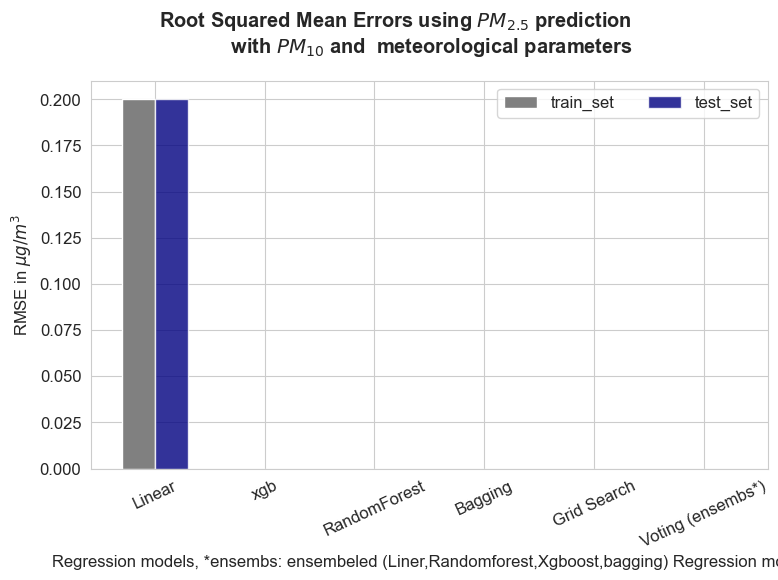

In [220]:
bw = 0.3
idx = np.arange(len(df2))
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(idx-bw/2, df2['train_rmse'], bw, color='gray', label='train_set')
ax.bar(idx+bw/2, df2['test_rmse'], bw, color='navy', alpha=0.8, label='test_set')
ax.set_xticklabels(['','Linear', 'xgb', 'RandomForest','Bagging',
                    'Grid Search', 'Voting (ensembs*)'],
                  rotation=25)
ax.set_xlabel('Regression models, *ensembs: ensembeled (Liner,Randomforest,Xgboost,bagging) Regression model')
ax.set_title('Root Squared Mean Errors using $PM_{2.5}$ prediction\
             \n with $PM_{10}$ and  meteorological parameters',
            y=1.05,
            weight='bold')
# labels = ax.get_xticklabels()
ax.set_ylabel('RMSE in $\mu g/m^3$')
ax.legend(frameon=True, ncol=2)
fig.tight_layout()


In [221]:
res_data=pd.DataFrame(data)

In [222]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is in the format provided
models = ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Gridsearch', 'Voting']


train_rmse = res_data[res_data['Set'] == 'Training']['RMSE'].tolist()
test_rmse = res_data[res_data['Set'] == 'Test']['RMSE'].tolist()
train_r2 = res_data[res_data['Set'] == 'Training']['R²'].tolist()
test_r2 = res_data[res_data['Set'] == 'Test']['R²'].tolist()




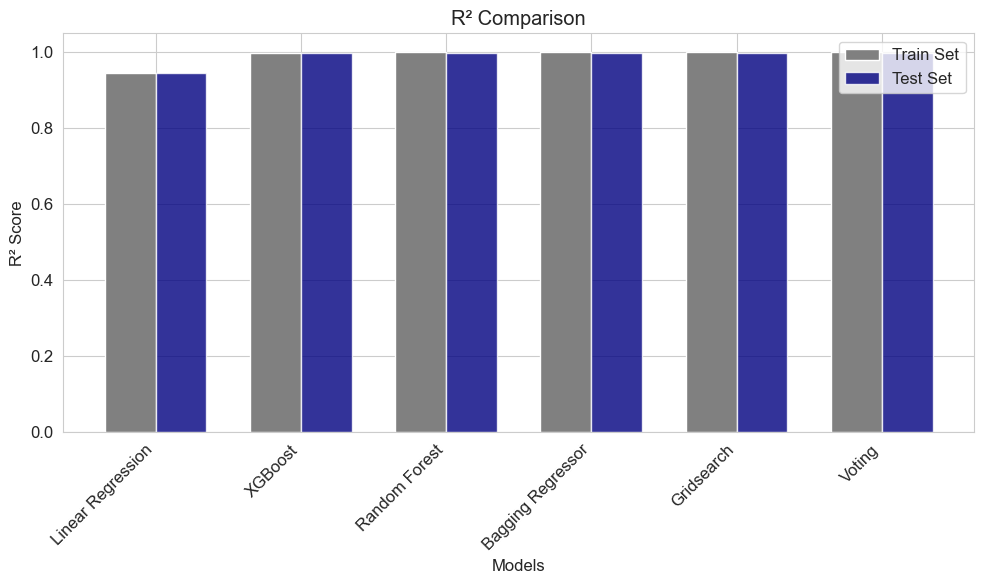

In [223]:
plot_metric(train_r2, test_r2, 'R² Score', 'R² Score', 'R² Comparison')

In [224]:
# res_data
display(res_data.style.background_gradient(cmap="summer"))

,Model,Set,RMSE,MSE,MAE,R²
0,Linear Regression,Training,0.174607,0.030488,0.094553,0.944970
1,Linear Regression,Test,0.175133,0.030672,0.094553,0.944835
2,XGBoost,Training,0.029515,0.000871,0.020548,0.998428
3,XGBoost,Test,0.040105,0.001608,0.022242,0.997107
4,Random Forest,Training,0.011435,0.000131,0.007870,0.999764
5,Random Forest,Test,0.030539,0.000933,0.021126,0.998323
6,Bagging Regressor,Training,0.013420,0.000180,0.008565,0.999675
7,Bagging Regressor,Test,0.021908,0.001012,0.021908,0.998179
8,GrisearchCV,Training,0.013420,0.000180,0.000180,0.999675
9,GrisearchCV,Test,0.034940,0.001221,0.001221,0.997804


In [225]:

# 'Model': 'GrisearchCV', 'Set': 'Test', 'RMSE': grid_test_rmse, 'MSE': grid_test_mse, 'MAE': grid_test_mse, 'R²': grid_test_r2},
# Create DataFrame
rest = {

    "Models": ['Linear Regression', 'XGBoost', 'Random Forest', 'Bagging Regressor', 'Gridsearch', 'Voting'],
    "MAE": [lin_test_mae,xgb_test_mae, rf_test_mae, bgg_test_mae, grid_test_mae,vm_test_mae],
    "MSE": [lin_test_mse,xgb_test_mse, rf_test_mse, bgg_test_mse,grid_test_mse,  vm_test_mse],
    "RMSE": [lin_test_rmse,xgb_test_rmse, rf_test_rmse, bgg_test_rmse,grid_test_rmse,  vm_test_rmse],
    "R-squared": [lin_test_r2,xgb_test_r2, rf_test_r2, bgg_test_r2,grid_test_r2,  vm_test_r2],
}




res = pd.DataFrame(rest)
# Round the numeric columns to 4 decimal places
res.iloc[:, 1:] = res.iloc[:, 1:].round(4)

display(res.style.background_gradient(cmap="summer"))


,Models,MAE,MSE,RMSE,R-squared
0,Linear Regression,0.095100,0.030700,0.175100,0.944800
1,XGBoost,0.022200,0.001600,0.040100,0.997100
2,Random Forest,0.021100,0.000900,0.030500,0.998300
3,Bagging Regressor,0.021900,0.001000,0.031800,0.998200
4,Gridsearch,0.021700,0.001200,0.034900,0.997800
5,Voting,0.020800,0.001000,0.031200,0.998300


>Conclusion: It can be seen that the voting is the  best model in the prediction

### Scipy interval 95%

> Testing the best models result using the confidence interval

In [226]:
# let use stats from scipy library
from scipy import stats

In [227]:
# and look confidence of .95, or the area that a value will be inside the range with 95 chances of 100
confidence = 0.95

#### Random Forest model test

In [228]:
# let see how grid search performs
# train set
forest_ytest_p = forest_reg.predict(X_test_scaled)


In [229]:
squared_errors = (forest_ytest_p - y_test)**2

In [230]:
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([0.02983558, 0.03122709])

- so we are pretty sure that standard deviation from random forest is from 0.0298 to 0.0312
- how confidience: 95 chances out of 100, this RMSE will be within this range

#### Voting model test


In [231]:
voting_ytest_p = voting_reg.predict(X_test_scaled)
vsquared_errors = (voting_ytest_p - y_test)**2

In [232]:
np.sqrt(stats.t.interval(
    confidence,
    len(vsquared_errors)-1,
    loc=vsquared_errors.mean(),
    scale=stats.sem(vsquared_errors)))

array([0.02979458, 0.03250567])

- We are pretty sure that standard deviation from voting is from 0.0298 to 0.0325
- how confidience: 95 chances out of 100, this RMSE will be within this range

## Save Model

In [233]:
import joblib

In [234]:
import os
try:
    os.makedirs('models')
except FileExistsError:
    pass

In [235]:
forestmodelpath=r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/forest_reg.pkl'
votemodelpath=r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/voting_reg.pkl'

In [236]:
def save_model(model,modelpath):
    joblib.dump(model, modelpath )
    print(f"Model saved successfully in {modelpath}")

In [237]:
save_model(forest_reg,forestmodelpath)


Model saved successfully in C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/forest_reg.pkl


In [238]:
save_model(voting_reg,votemodelpath)

Model saved successfully in C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/voting_reg.pkl


## Model Inference

In [1]:
def predict_single_data_point(model, data_point,X_train, scaler):
    pd.seed(279)
    """
    Predict PM2.5 for a single data point, handling missing pm25_rolling_mean.

    Parameters:
    - model: trained model
    - data_point: new data point for prediction (dictionary or pandas series)
    - recent_data: optional, recent data points to calculate rolling mean (DataFrame)
    """
    if isinstance(data_point, dict):
        data_point = pd.Series(data_point)

    pm25_rolling_mean=X_train['pm25_rolling_mean'].mean()
    dp=data_point.values
    data_point_with_rolling_mean = np.append(dp, pm25_rolling_mean)
    newdp=np.array([data_point_with_rolling_mean])
    newdp_scaled=load_scaler.transform(newdp)
    test_pred = fmodel.predict(newdp_scaled)
    return np.expm1(test_pred)[0]

In [ ]:
X_test.iloc[-5].drop('pm25_rolling_mean')

In [ ]:
y_test.iloc[-5]

In [ ]:
np.expm1(y_test.iloc[-5])

In [ ]:
myYdata=67
myXdata=np.array([73 ,33 , 69, 1.008, 0.7,101,1.8,10,29])


In [ ]:
forestmodelpath=r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/forest_reg.pkl'
votemodelpath=r'C:\Users\acer\Documents\PROJECTS\New CODE WORKS\JAn24\Dustpredict\softcopy\Dust-Particle-Control-System\models/voting_reg.pkl'

In [242]:
load_scaler= joblib.load('C:\\Users\\acer\\Documents\\PROJECTS\\New CODE WORKS\\JAn24\\Dustpredict\\softcopy\\Dust-Particle-Control-System\\scaler.pkl')

In [243]:
vmodel=joblib.load(votemodelpath)
fmodel=joblib.load(forestmodelpath)

In [244]:
X_test.iloc[:5]

,pm10,temp,hum,press,wspd,wdir,rain,hour,minutes,pm25_rolling_mean
datetime,,,,,,,,,,
2024-05-01 18:24:15,31.0,31.0,81.0,1.002,0.3,143.0,0.0,18,24,3.505128
2024-02-16 10:01:28,61.0,30.3,64.0,1.011,2.1,100.0,18.4,10,1,3.818424
2024-05-04 08:43:42,73.0,29.5,86.0,1.007,1.7,87.0,0.0,8,43,4.152598
2024-03-25 02:29:31,32.0,28.6,78.0,1.008,1.6,95.0,0.0,2,29,3.415443
2024-04-30 15:10:23,47.0,36.0,59.0,1.004,1.4,283.0,0.0,15,10,3.696282


In [297]:
y_test.iloc[:5]

datetime
2024-05-01 18:24:15    3.433987
2024-02-16 10:01:28    3.912023
2024-05-04 08:43:42    3.988984
2024-03-25 02:29:31    3.465736
2024-04-30 15:10:23    3.688879
Name: pm25_log, dtype: float64

In [380]:
np.expm1(y_test.iloc[0])

np.float64(30.0)

In [364]:
test=X_test.iloc[1000].values
test=np.array([test])
test_scaled=load_scaler.transform(test)
test_p = vmodel.predict(test_scaled)
np.expm1(test_p)


array([34.07592778])

In [3]:
data_point=X_test.iloc[100].drop('pm25_rolling_mean')
pm25_rolling_mean=X_train['pm25_rolling_mean'].mean()
dp=data_point.values
data_point_with_rolling_mean = np.append(dp, pm25_rolling_mean)
# data_point=pd.Series(myXdata)
data_point_with_rolling_mean
newdp=np.array([data_point_with_rolling_mean])
newdp_scaled=load_scaler.transform(newdp)
test_pred = fmodel.predict(newdp_scaled)
np.expm1(test_pred)

NameError: name 'X_test' is not defined

In [2]:
predict_single_data_point(fmodel, data_point,X_train, load_scaler)

NameError: name 'fmodel' is not defined